In [9]:
### Reloads modules properly
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
%load_ext lab_black

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# DBSCAN pT weighted

Lets see what happens to the results of DBSCAN if I weight the clustering by pT

**Load_data**

In [12]:
!ls /home/raichu/data/

data  mc_25k.pkl  trk_processed_25k.pkl


In [13]:
trk = pd.read_pickle("/home/raichu/data/trk_processed_25k.pkl")
mc = pd.read_pickle("/home/raichu/data/mc_25k.pkl")

**Run the standard stuff first**

In [14]:
from primaryvertexingtools import create_pv_truth_labels

ImportError: cannot import name 'create_pv_truth_labels' from 'primaryvertexingtools' (/home/raichu/Documents/db-clustering/notebooks/primaryvertexingtools.py)

In [ ]:
trk = create_pv_truth_labels(trk)

In [34]:
from primaryvertexingtools import PrimaryVertexing

In [16]:
fh_bins = np.linspace(-15, 15, 256)

In [28]:
mydict = {"track_data": trk, "truth_data": mc, "fh_bins": fh_bins, "test_run": False}

In [29]:
PV = PrimaryVertexing(mydict)

Initialized Primary Vertexing setup


In [15]:
PV.run_fh()

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25000/25000 [00:26<00:00, 957.46it/s]


Ran Fast Histo


In [16]:
PV.run_dbscan(stat="median")

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 24999/25000 [06:13<00:00, 57.18it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2


In [21]:
from primaryvertexingtools import PerformanceMetrics

In [18]:
pm = PerformanceMetrics(PV)

0.11908531
positive bias 0.03469515
negative bias -0.035159588


In [19]:
pm.pv_efficiency((pm.z0_gen - pm.z0_reco_fh_cor), display=True)

74.29 %


In [20]:
pm.pv_efficiency((pm.z0_gen - pm.z0_reco_db_cor), display=True)

78.03 %


# Use a standard "mean" approach:

In [419]:
PV = PrimaryVertexing(mydict)

Initialized Primary Vertexing setup


In [420]:
PV.run_fh()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1001/1001 [00:00<00:00, 1073.19it/s]


Ran Fast Histo


In [423]:
PV.run_dbscan(eps=0.15, stat="fast_histo", convolve=True, weighted_mean=False, nbins=20)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 997/1001 [00:19<00:00, 51.60it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.15, minPts: 2


In [424]:
pm_fhdb = PerformanceMetrics(PV)
pm_fhdb.pv_efficiency((pm_fhdb.z0_gen - pm_fhdb.z0_reco_db_cor), display=True)

0.11272025
positive bias 0.061186464209305846
negative bias -0.0076930236659552564
67.03 %


In [22]:
pm_mean = PerformanceMetrics(PV)

0.11908531
positive bias 0.0339607
negative bias -0.035259247


In [23]:
pm_mean.pv_efficiency((pm_mean.z0_gen - pm_mean.z0_reco_db_cor), display=True)

74.45 %


# Use a 20%-80% "mean" approach

In [99]:
mydict = {"track_data": trk, "truth_data": mc, "fh_bins": fh_bins, "test_run": True}
PV_skim = PrimaryVertexing(mydict)

Initialized Primary Vertexing setup


In [100]:
PV_skim.run_fh()

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1001/1001 [00:01<00:00, 784.33it/s]

Ran Fast Histo


In [228]:
PV_skim.run_dbscan(stat="skim_iqr", threshold=0.4, skim=0.2)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 1000/1001 [00:19<00:00, 47.84it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2


In [229]:
pm_skim_mean = PerformanceMetrics(PV_skim)

0.11272025
positive bias 0.03325081
negative bias -0.035511337


In [230]:
pm_skim_mean.pv_efficiency(
    (pm_skim_mean.z0_gen - pm_skim_mean.z0_reco_fh_cor), display=True
)

75.62 %


In [231]:
pm_skim_mean.pv_efficiency(
    (pm_skim_mean.z0_gen - pm_skim_mean.z0_reco_db_cor), display=True
)

77.22 %


In [220]:
pm_skim_mean.pv_eff

75.12487512487513

# Analyzing Percentages

In [232]:
mydict = {"track_data": trk, "truth_data": mc, "fh_bins": fh_bins, "test_run": True}
PV_skim = PrimaryVertexing(mydict)

Initialized Primary Vertexing setup


In [233]:
PV_skim.run_fh()

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1001/1001 [00:01<00:00, 990.40it/s]

Ran Fast Histo


In [234]:
PV_skim.run_dbscan(stat="median")

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 992/1001 [00:14<00:00, 84.34it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2


In [235]:
pm_skim_mean = PerformanceMetrics(PV_skim)

0.11272025
positive bias 0.03160906
negative bias -0.03859341


In [236]:
pm_skim_mean.pv_efficiency(
    (pm_skim_mean.z0_gen - pm_skim_mean.z0_reco_fh_cor), display=True
)
fh_eff = pm_skim_mean.pv_eff

75.62 %


In [237]:
pm_skim_mean.pv_efficiency(
    (pm_skim_mean.z0_gen - pm_skim_mean.z0_reco_db_cor), display=True
)
db_median_eff = pm_skim_mean.pv_eff

77.12 %


In [238]:
fh_eff

75.62437562437563

In [265]:
PV_skim.run_dbscan(stat="mean")

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1001/1001 [00:20<00:00, 42.21it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2


In [266]:
pm_skim_mean = PerformanceMetrics(PV_skim)

0.11272025
positive bias 0.029330254
negative bias -0.037595034


In [267]:
pm_skim_mean.pv_efficiency(
    (pm_skim_mean.z0_gen - pm_skim_mean.z0_reco_db_cor), display=True
)
db_mean_eff = pm_skim_mean.pv_eff

75.12 %


In [268]:
PV_skim.run_dbscan(stat="skim_iqr", iqr_x=[25, 75])

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1001/1001 [00:24<00:00, 37.16it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2


In [269]:
pm_skim_mean = PerformanceMetrics(PV_skim)

0.11272025
positive bias 0.03325081
negative bias -0.035511337


In [270]:
pm_skim_mean.pv_efficiency(
    (pm_skim_mean.z0_gen - pm_skim_mean.z0_reco_db_cor), display=True
)
db_iqr_eff = pm_skim_mean.pv_eff

77.22 %


In [271]:
PV_skim.run_dbscan(stat="skim_iqr", iqr_x=[15, 85])

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 1000/1001 [00:26<00:00, 36.02it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2


In [272]:
pm_skim_mean = PerformanceMetrics(PV_skim)

0.11272025
positive bias 0.032760143
negative bias -0.0349499


In [273]:
pm_skim_mean.pv_efficiency(
    (pm_skim_mean.z0_gen - pm_skim_mean.z0_reco_db_cor), display=True
)
db_iqr1585_eff = pm_skim_mean.pv_eff

76.32 %


In [274]:
PV_skim.run_dbscan(stat="skim_iqr", iqr_x=[30, 70])

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 997/1001 [00:25<00:00, 47.57it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2


In [275]:
pm_skim_mean = PerformanceMetrics(PV_skim)

0.11272025
positive bias 0.031476498
negative bias -0.03618884


In [276]:
pm_skim_mean.pv_efficiency(
    (pm_skim_mean.z0_gen - pm_skim_mean.z0_reco_db_cor), display=True
)
db_iqr3070_eff = pm_skim_mean.pv_eff

78.92 %


In [240]:
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.8, 1.0, 1.2, 1.5]
skims = [0.05, 0.1, 0.2, 0.25, 0.3, 0.35]

In [252]:
results_matrix = np.zeros((len(thresholds), len(skims)))

for i, th in enumerate(thresholds):
    for j, sk in enumerate(skims):
        PV_skim.run_dbscan(stat="skim_mean", threshold=th, skim=sk)
        pm_skim_mean = PerformanceMetrics(PV_skim)
        pm_skim_mean.pv_efficiency(
            (pm_skim_mean.z0_gen - pm_skim_mean.z0_reco_db_cor), display=False
        )
        results_matrix[i][j] = pm_skim_mean.pv_eff

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 999/1001 [00:13<00:00, 76.98it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2
0.11272025
positive bias 0.029330254
negative bias -0.037595034


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1001/1001 [00:15<00:00, 75.65it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2
0.11272025
positive bias 0.029684782
negative bias -0.037595034


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 994/1001 [00:14<00:00, 95.14it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2
0.11272025
positive bias 0.032521248
negative bias -0.039049506


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1001/1001 [00:15<00:00, 54.17it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2
0.11272025
positive bias 0.028693676
negative bias -0.041065827


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 1000/1001 [00:13<00:00, 76.85it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2
0.11272025
positive bias 0.029578686
negative bias -0.040775895


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 1000/1001 [00:14<00:00, 87.96it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2
0.11272025
positive bias 0.030050755
negative bias -0.040848374


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 998/1001 [00:13<00:00, 79.70it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2
0.11272025
positive bias 0.029330254
negative bias -0.037595034


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 996/1001 [00:13<00:00, 74.64it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2
0.11272025
positive bias 0.029330254
negative bias -0.037595034


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1001/1001 [00:14<00:00, 76.31it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2
0.11272025
positive bias 0.029684782
negative bias -0.037595034


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 998/1001 [00:15<00:00, 53.03it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2
0.11272025
positive bias 0.029330254
negative bias -0.03780055


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 1000/1001 [00:15<00:00, 40.91it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2
0.11272025
positive bias 0.029578686
negative bias -0.0362885


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 1000/1001 [00:14<00:00, 62.14it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2
0.11272025
positive bias 0.029684782
negative bias -0.03780055


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 999/1001 [00:14<00:00, 75.62it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2
0.11272025
positive bias 0.029330254
negative bias -0.037595034


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 998/1001 [00:16<00:00, 61.33it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2
0.11272025
positive bias 0.029330254
negative bias -0.037595034


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 997/1001 [00:15<00:00, 68.15it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2
0.11272025
positive bias 0.029330254
negative bias -0.037595034


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 997/1001 [00:15<00:00, 52.19it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2
0.11272025
positive bias 0.029330254
negative bias -0.037595034


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1001/1001 [00:15<00:00, 63.22it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2
0.11272025
positive bias 0.029271126
negative bias -0.037595034


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 995/1001 [00:16<00:00, 73.70it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2
0.11272025
positive bias 0.02897358
negative bias -0.03780055


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 997/1001 [00:15<00:00, 50.56it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2
0.11272025
positive bias 0.029330254
negative bias -0.037595034


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 994/1001 [00:17<00:00, 77.96it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2
0.11272025
positive bias 0.029330254
negative bias -0.037595034


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 997/1001 [00:14<00:00, 47.78it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2
0.11272025
positive bias 0.029330254
negative bias -0.037595034


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 994/1001 [00:15<00:00, 84.86it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2
0.11272025
positive bias 0.029330254
negative bias -0.037595034


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 996/1001 [00:15<00:00, 87.86it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2
0.11272025
positive bias 0.029330254
negative bias -0.037595034


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 993/1001 [00:14<00:00, 78.99it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2
0.11272025
positive bias 0.029271126
negative bias -0.037595034


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 1000/1001 [00:15<00:00, 58.85it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2
0.11272025
positive bias 0.029330254
negative bias -0.037595034


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 994/1001 [00:17<00:00, 61.82it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2
0.11272025
positive bias 0.029330254
negative bias -0.037595034


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1001/1001 [00:16<00:00, 49.92it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2
0.11272025
positive bias 0.029330254
negative bias -0.037595034


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 999/1001 [00:16<00:00, 58.59it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2
0.11272025
positive bias 0.029330254
negative bias -0.037595034


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1001/1001 [00:16<00:00, 74.23it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2
0.11272025
positive bias 0.029330254
negative bias -0.037595034


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 997/1001 [00:15<00:00, 72.15it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2
0.11272025
positive bias 0.029330254
negative bias -0.037595034


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 999/1001 [00:15<00:00, 76.97it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2
0.11272025
positive bias 0.029330254
negative bias -0.037595034


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 995/1001 [00:15<00:00, 48.88it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2
0.11272025
positive bias 0.029330254
negative bias -0.037595034


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 995/1001 [00:17<00:00, 71.73it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2
0.11272025
positive bias 0.029330254
negative bias -0.037595034


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 998/1001 [00:16<00:00, 51.22it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2
0.11272025
positive bias 0.029330254
negative bias -0.037595034


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 996/1001 [00:14<00:00, 67.62it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2
0.11272025
positive bias 0.029330254
negative bias -0.037595034


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1001/1001 [00:15<00:00, 54.84it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2
0.11272025
positive bias 0.029330254
negative bias -0.037595034


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 999/1001 [00:15<00:00, 59.99it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2
0.11272025
positive bias 0.029330254
negative bias -0.037595034


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 995/1001 [00:15<00:00, 69.57it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2
0.11272025
positive bias 0.029330254
negative bias -0.037595034


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 996/1001 [00:15<00:00, 68.24it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2
0.11272025
positive bias 0.029330254
negative bias -0.037595034


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 998/1001 [00:17<00:00, 53.70it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2
0.11272025
positive bias 0.029330254
negative bias -0.037595034


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 995/1001 [00:15<00:00, 86.55it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2
0.11272025
positive bias 0.029330254
negative bias -0.037595034


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 999/1001 [00:13<00:00, 55.80it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2
0.11272025
positive bias 0.029330254
negative bias -0.037595034


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 1000/1001 [00:16<00:00, 55.89it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2
0.11272025
positive bias 0.029330254
negative bias -0.037595034


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 994/1001 [00:15<00:00, 62.74it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2
0.11272025
positive bias 0.029330254
negative bias -0.037595034


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1001/1001 [00:16<00:00, 51.05it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2
0.11272025
positive bias 0.029330254
negative bias -0.037595034


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 1000/1001 [00:16<00:00, 78.08it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2
0.11272025
positive bias 0.029330254
negative bias -0.037595034


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 998/1001 [00:14<00:00, 85.11it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2
0.11272025
positive bias 0.029330254
negative bias -0.037595034


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 996/1001 [00:15<00:00, 54.03it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2
0.11272025
positive bias 0.029330254
negative bias -0.037595034


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 995/1001 [00:14<00:00, 63.35it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2
0.11272025
positive bias 0.029330254
negative bias -0.037595034


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 1000/1001 [00:14<00:00, 54.39it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2
0.11272025
positive bias 0.029330254
negative bias -0.037595034


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 997/1001 [00:13<00:00, 60.97it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2
0.11272025
positive bias 0.029330254
negative bias -0.037595034


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 997/1001 [00:13<00:00, 72.10it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2
0.11272025
positive bias 0.029330254
negative bias -0.037595034


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 998/1001 [00:17<00:00, 55.15it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2
0.11272025
positive bias 0.029330254
negative bias -0.037595034


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 998/1001 [00:17<00:00, 65.44it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2
0.11272025
positive bias 0.029330254
negative bias -0.037595034


In [255]:
results_matrix

array([[75.12487512, 75.32467532, 73.42657343, 72.52747253, 70.42957043,
        68.33166833],
       [75.12487512, 75.12487512, 75.22477522, 74.32567433, 73.02697303,
        71.52847153],
       [75.12487512, 75.12487512, 75.12487512, 75.22477522, 75.02497502,
        74.22577423],
       [75.12487512, 75.12487512, 75.12487512, 75.12487512, 75.22477522,
        75.22477522],
       [75.12487512, 75.12487512, 75.12487512, 75.12487512, 75.12487512,
        75.12487512],
       [75.12487512, 75.12487512, 75.12487512, 75.12487512, 75.12487512,
        75.12487512],
       [75.12487512, 75.12487512, 75.12487512, 75.12487512, 75.12487512,
        75.12487512],
       [75.12487512, 75.12487512, 75.12487512, 75.12487512, 75.12487512,
        75.12487512],
       [75.12487512, 75.12487512, 75.12487512, 75.12487512, 75.12487512,
        75.12487512]])

In [257]:
np.max(results_matrix)

75.32467532467533

In [258]:
np.argmax(results_matrix)

1

In [260]:
results_matrix[0][1]

75.32467532467533

In [262]:
thresholds[0]

0.1

In [263]:
skims[1]

0.1

In [264]:
mean_eff_max = np.max(results_matrix)

In [279]:
db_iqr1585_eff

76.32367632367632

Text(0.5, 1.0, 'comparison of primary vertex efficiency\n using different statistics')

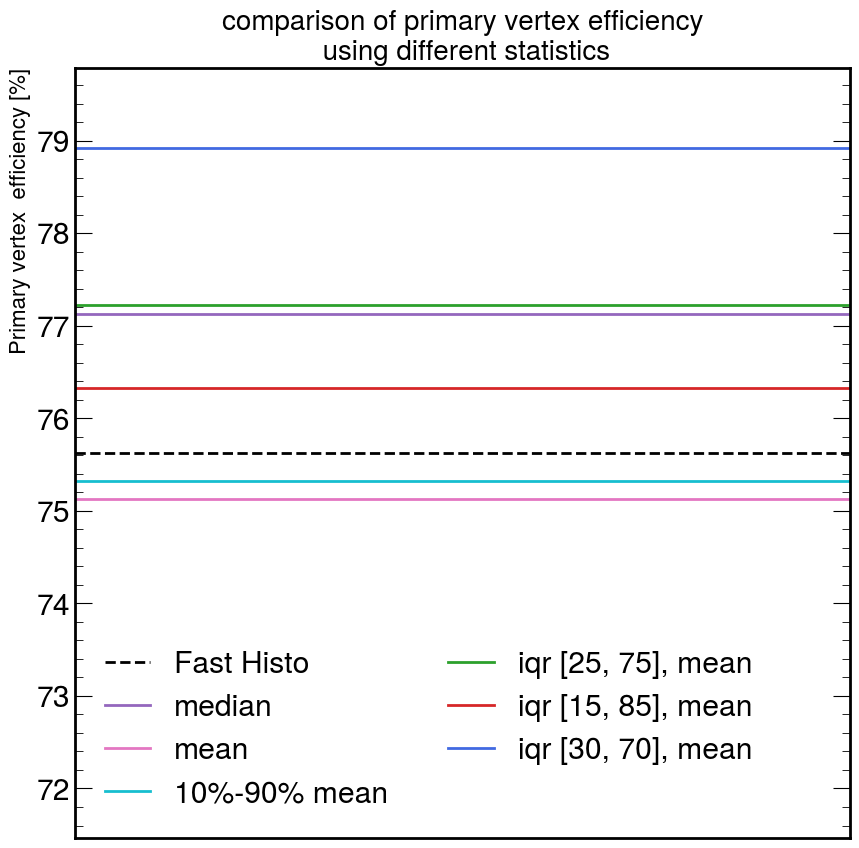

In [306]:
plt.axhline(fh_eff, label="Fast Histo", ls="--", color="k", lw=2)
plt.axhline(db_median_eff, label="median", color="tab:purple", lw=2)
plt.axhline(db_mean_eff, label="mean", color="tab:pink", lw=2)
plt.axhline(mean_eff_max, label="10%-90% mean", color="tab:cyan", lw=2)
plt.axhline(db_iqr_eff, label="iqr [25, 75], mean", color="tab:green", lw=2)
plt.axhline(db_iqr1585_eff, label="iqr [15, 85], mean", color="tab:red", lw=2)
plt.axhline(db_iqr3070_eff, label="iqr [30, 70], mean", color="royalblue", lw=2)
plt.legend(ncols=2)
_ = plt.xticks([])
_ = plt.ylabel("Primary vertex  efficiency [%]", fontsize=16)
plt.title(
    "comparison of primary vertex efficiency\n using different statistics", fontsize=20
)

In [307]:
stats = [
    "Fast Histo",
    "Median",
    "mean",
    "10%-90% mean",
    "iqr (25, 75)+mean",
    "iqr (15, 85)+mean",
    "iqr (30, 70)+mean",
]

In [308]:
eff = [
    fh_eff,
    db_median_eff,
    db_mean_eff,
    mean_eff_max,
    db_iqr_eff,
    db_iqr1585_eff,
    db_iqr3070_eff,
]

In [314]:
colors = [
    "black",
    "tab:purple",
    "tab:pink",
    "tab:cyan",
    "tab:green",
    "tab:red",
    "royalblue",
]

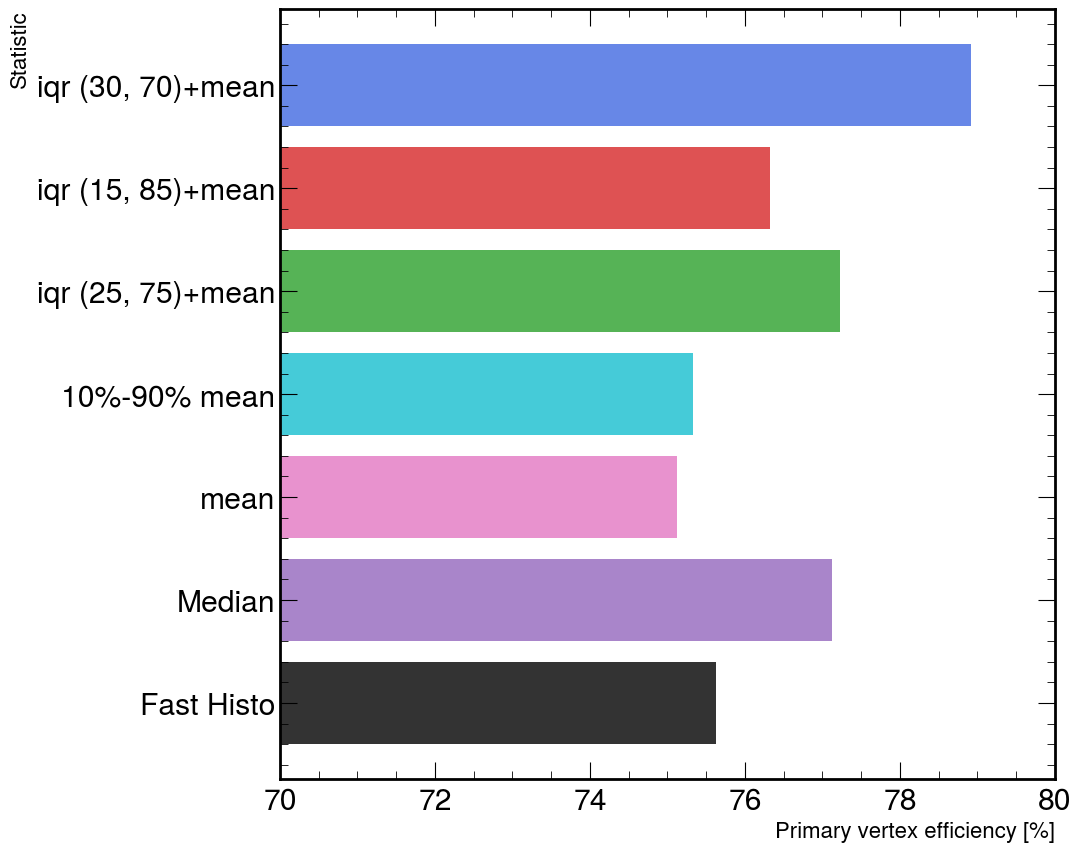

In [323]:
plt.barh(stats, eff, color=colors, alpha=0.8)
plt.xlim([70, 80])
plt.xlabel("Primary vertex efficiency [%]", fontsize=16)
plt.ylabel("Statistic", fontsize=16)
plt.savefig(
    "plots/primary_vertex_different_statistics.png", dpi=300, bbox_inches="tight"
)

In [247]:
a = np.zeros((2, 2))

In [248]:
a

array([[0., 0.],
       [0., 0.]])

In [251]:
a[0][0] = (0,0)

ValueError: setting an array element with a sequence.

# Using Fast Histo approach for PV determination with DBSCAN

In [325]:
np.linspace(-1.5, 1.5, 50)

array([-1.5       , -1.43877551, -1.37755102, -1.31632653, -1.25510204,
       -1.19387755, -1.13265306, -1.07142857, -1.01020408, -0.94897959,
       -0.8877551 , -0.82653061, -0.76530612, -0.70408163, -0.64285714,
       -0.58163265, -0.52040816, -0.45918367, -0.39795918, -0.33673469,
       -0.2755102 , -0.21428571, -0.15306122, -0.09183673, -0.03061224,
        0.03061224,  0.09183673,  0.15306122,  0.21428571,  0.2755102 ,
        0.33673469,  0.39795918,  0.45918367,  0.52040816,  0.58163265,
        0.64285714,  0.70408163,  0.76530612,  0.82653061,  0.8877551 ,
        0.94897959,  1.01020408,  1.07142857,  1.13265306,  1.19387755,
        1.25510204,  1.31632653,  1.37755102,  1.43877551,  1.5       ])

In [326]:
mydict = {"track_data": trk, "truth_data": mc, "fh_bins": fh_bins, "test_run": True}
PV_dbfh = PrimaryVertexing(mydict)

Initialized Primary Vertexing setup


In [432]:
PV_dbfh.run_fh()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1001/1001 [00:00<00:00, 1018.34it/s]


Ran Fast Histo


In [429]:
PV_dbfh.run_dbscan(stat="fast_histo", nbins=20, weighted_mean=False)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 1000/1001 [00:17<00:00, 58.07it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2


In [433]:
pm_dbfh = PerformanceMetrics(PV_dbfh)

0.11272025
positive bias 0.05484153095044597
negative bias -0.02515436865781455


In [434]:
pm_dbfh.pv_efficiency((pm_dbfh.z0_gen - pm_dbfh.z0_reco_fh_cor), display=True)

75.62 %


In [430]:

pm_dbfh.pv_efficiency((pm_dbfh.z0_gen - pm_dbfh.z0_reco_db_cor), display=True)
db_fh = pm_dbfh.pv_eff
print(db_fh)

1.9927514
positive bias 0.05484153095044597
negative bias -0.02515436865781455
65.83 %
65.83416583416583


In [361]:
pv_eff_dbfh_nbins = []
n_bins = [5, 10, 15, 20, 30, 40, 50, 100]
for nb in n_bins:
    PV_dbfh.run_dbscan(stat="fast_histo", nbins=nb, weighted_mean=False)
    _pm = PerformanceMetrics(PV_dbfh)
    print(nb)
    _pm.pv_efficiency((_pm.z0_gen - _pm.z0_reco_db_cor), display=True)
    pv_eff_dbfh_nbins.append(_pm.pv_eff)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 997/1001 [00:13<00:00, 59.81it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2
0.11272025
positive bias 0.06589698791503906
negative bias -0.003666788339614868
5
72.83 %


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 999/1001 [00:16<00:00, 65.36it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2
0.11272025
positive bias 0.050095319747924805
negative bias -0.023073355356852066
10
71.43 %


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 998/1001 [00:16<00:00, 47.22it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2
0.11272025
positive bias 0.050268581935337675
negative bias -0.025124311447143555
15
68.83 %


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 995/1001 [00:17<00:00, 88.35it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2
0.11272025
positive bias 0.05484153095044597
negative bias -0.02515436865781455
20
65.83 %


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 1000/1001 [00:16<00:00, 86.77it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2
0.11272025
positive bias 0.059035041979674636
negative bias -0.026633865874389068
30
62.84 %


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 995/1001 [00:17<00:00, 57.67it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2
0.11272025
positive bias 0.055775798284090516
negative bias -0.03297889232635498
40
61.64 %


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 999/1001 [00:17<00:00, 56.32it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2
0.11272025
positive bias 0.053612643358658785
negative bias -0.03612347865591259
50
62.04 %


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 998/1001 [00:18<00:00, 68.83it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2
0.11272025
positive bias 0.044380784757209746
negative bias -0.04167030074379641
100
61.64 %


In [362]:
pv_eff_dbfh_nbins

[72.82717282717283,
 71.42857142857143,
 68.83116883116882,
 65.83416583416583,
 62.837162837162836,
 61.63836163836164,
 62.03796203796204,
 61.63836163836164]

In [363]:
pv_eff_dbfh_weight_nbins = []
n_bins = [5, 10, 15, 20, 30, 40, 50, 100]
for nb in n_bins:
    PV_dbfh.run_dbscan(stat="fast_histo", nbins=nb, weighted_mean=True)
    _pm = PerformanceMetrics(PV_dbfh)
    print(nb)
    _pm.pv_efficiency((_pm.z0_gen - _pm.z0_reco_db_cor), display=True)
    pv_eff_dbfh_weight_nbins.append(_pm.pv_eff)

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 994/1001 [00:18<00:00, 70.44it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2
0.11272025
positive bias 0.0245137346872889
negative bias -0.04341995923184255
5
75.82 %


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 1000/1001 [00:17<00:00, 61.37it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2
0.11272025
positive bias 0.025568714444390392
negative bias -0.04173002830307507
10
77.72 %


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 998/1001 [00:19<00:00, 51.58it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2
0.11272025
positive bias 0.025275141966534242
negative bias -0.03775101506149314
15
78.62 %


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 999/1001 [00:18<00:00, 52.46it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2
0.11272025
positive bias 0.029619086610583878
negative bias -0.034872256203684504
20
78.82 %


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 994/1001 [00:21<00:00, 72.55it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2
0.11272025
positive bias 0.02937978061549895
negative bias -0.03538409790174629
30
78.62 %


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1001/1001 [00:19<00:00, 67.09it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2
0.11272025
positive bias 0.02783438690753437
negative bias -0.03574014222828752
40
78.52 %


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 996/1001 [00:19<00:00, 51.87it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2
0.11272025
positive bias 0.029022248160133324
negative bias -0.035361961711871004
50
78.62 %


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 999/1001 [00:17<00:00, 57.59it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2
0.11272025
positive bias 0.028448677989516113
negative bias -0.035629322038563505
100
78.62 %


In [364]:
pv_eff_dbfh_weight_nbins

[75.82417582417582,
 77.72227772227772,
 78.62137862137862,
 78.82117882117882,
 78.62137862137862,
 78.52147852147853,
 78.62137862137862,
 78.62137862137862]

In [365]:
n_bins

[5, 10, 15, 20, 30, 40, 50, 100]

In [368]:
PV_dbfh.run_fh(weighted_mean=True)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1001/1001 [00:00<00:00, 1050.00it/s]

Ran Fast Histo


In [369]:
pm_dbfh = PerformanceMetrics(PV_dbfh)

pm_dbfh.pv_efficiency((pm_dbfh.z0_gen - pm_dbfh.z0_reco_fh_cor), display=True)
fhw = pm_dbfh.pv_eff
print(fhw)

1.9927514
positive bias 0.028448677989516113
negative bias -0.035629322038563505
3.5 %
3.4965034965034967


In [370]:
pv_eff_dbfh_weight_noconv_nbins = []
n_bins = [5, 10, 15, 20, 30, 40, 50, 100]
for nb in n_bins:
    PV_dbfh.run_dbscan(stat="fast_histo", nbins=nb, weighted_mean=True, convolve=False)
    _pm = PerformanceMetrics(PV_dbfh)
    print(nb)
    _pm.pv_efficiency((_pm.z0_gen - _pm.z0_reco_db_cor), display=True)
    pv_eff_dbfh_weight_noconv_nbins.append(_pm.pv_eff)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1001/1001 [00:18<00:00, 54.33it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2
1.9927514
positive bias 0.022546463966699015
negative bias -0.04377931980793193
5
78.22 %


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1001/1001 [00:19<00:00, 56.23it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2
1.9927514
positive bias 0.024598519104471084
negative bias -0.0414866234680489
10
77.82 %


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 999/1001 [00:16<00:00, 50.70it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2
1.9927514
positive bias 0.025881922166603566
negative bias -0.039883096490138215
15
78.92 %


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 997/1001 [00:17<00:00, 57.86it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2
1.9927514
positive bias 0.029804650968379143
negative bias -0.03664127376770665
20
79.02 %


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 998/1001 [00:17<00:00, 52.56it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2
1.9927514
positive bias 0.029649627079839203
negative bias -0.03656207790829442
30
79.02 %


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 1000/1001 [00:16<00:00, 53.25it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2
1.9927514
positive bias 0.029174975107320478
negative bias -0.03769475891114071
40
78.92 %


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 996/1001 [00:17<00:00, 56.00it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2
1.9927514
positive bias 0.028963089908801365
negative bias -0.03782876156878612
50
78.92 %


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 998/1001 [00:17<00:00, 55.94it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2
1.9927514
positive bias 0.029739711399273006
negative bias -0.03703840147922666
100
78.82 %


In [371]:
pv_eff_dbfh_weight_noconv_nbins

[78.22177822177822,
 77.82217782217782,
 78.92107892107892,
 79.02097902097903,
 79.02097902097903,
 78.92107892107892,
 78.92107892107892,
 78.82117882117882]

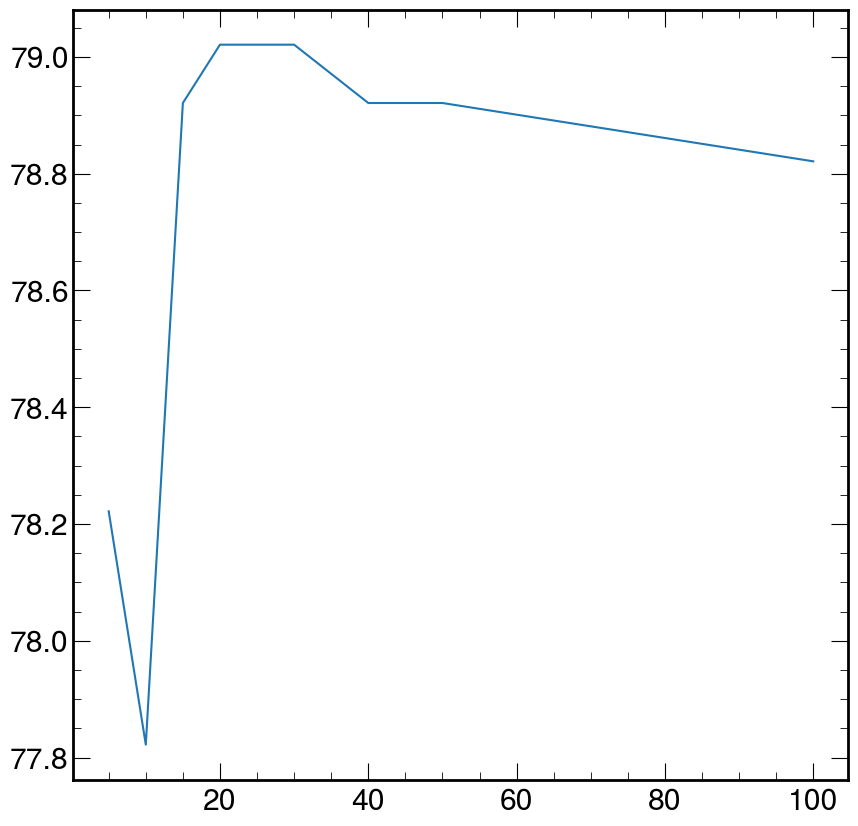

In [372]:
test_ax = []
ax = plt.axes()
ax.plot(n_bins, pv_eff_dbfh_weight_noconv_nbins)
test_ax.append(ax)

In [377]:
PV_dbfh.run_dbscan(stat="median")

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 997/1001 [00:20<00:00, 54.35it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2


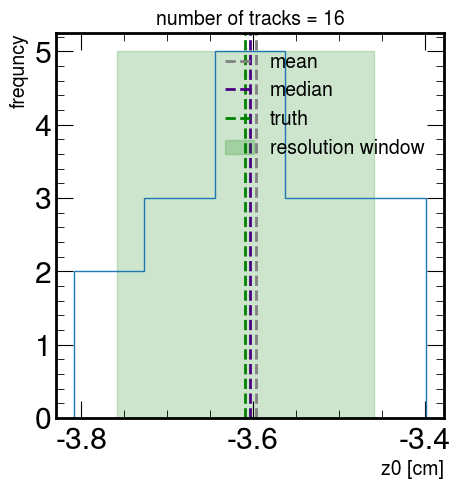

In [407]:
PV_dbfh.plot_pv(
    n=1,
    nbins=5,
    figsize=(5, 5),
)

/home/raichu/Documents/db-clustering/notebooks/primaryvertexingtools.py:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  z0_count = z0_pv.shape[0]


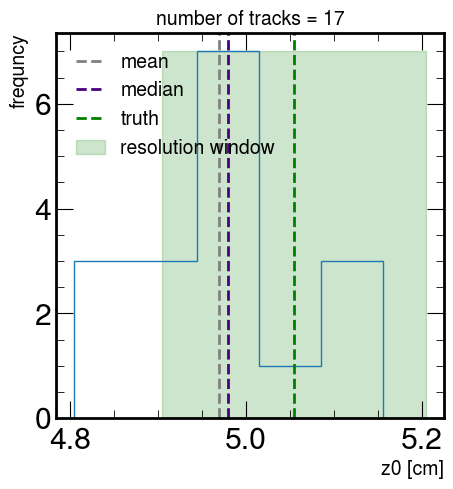

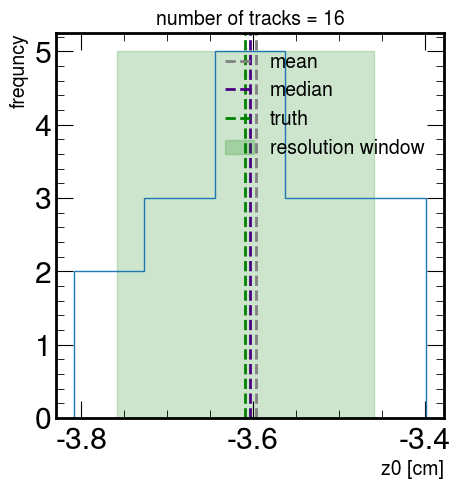

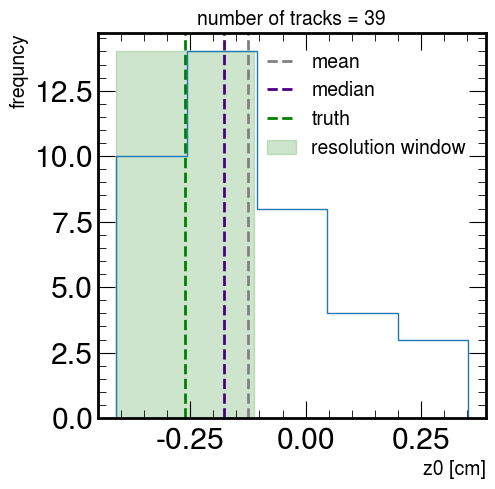

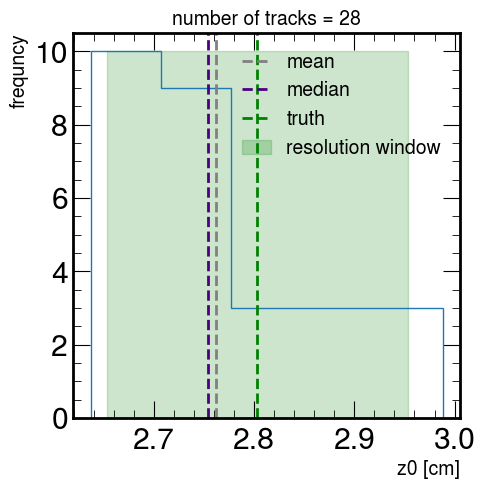

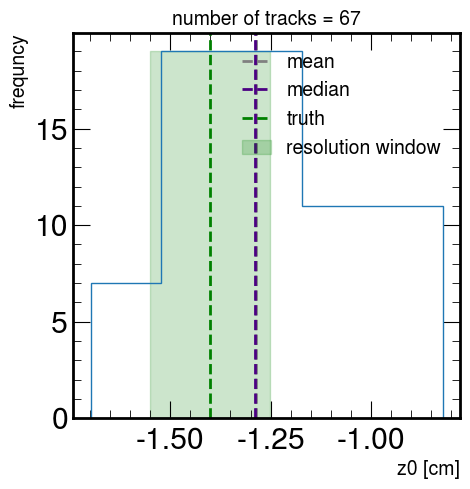

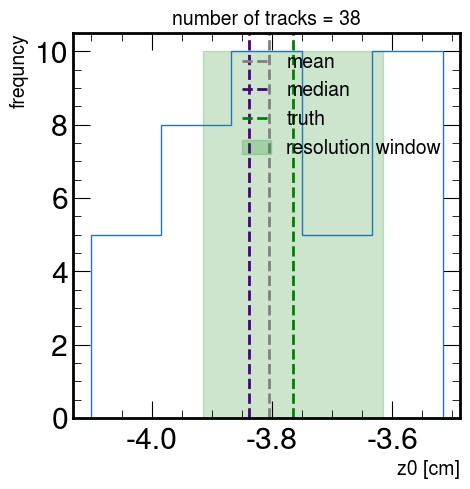

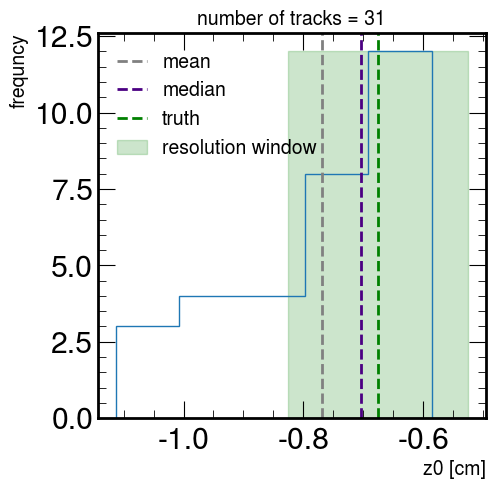

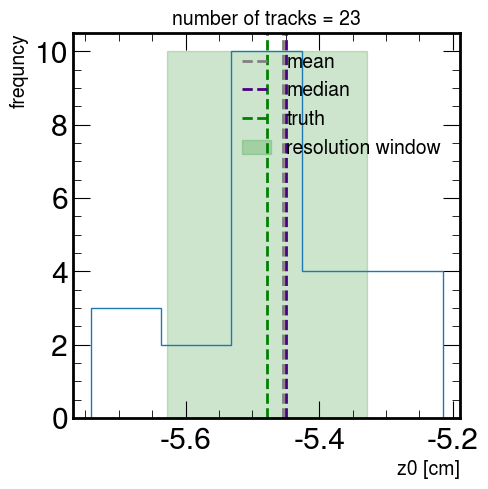

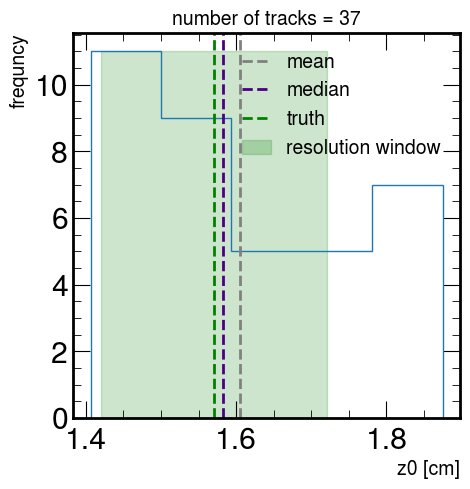

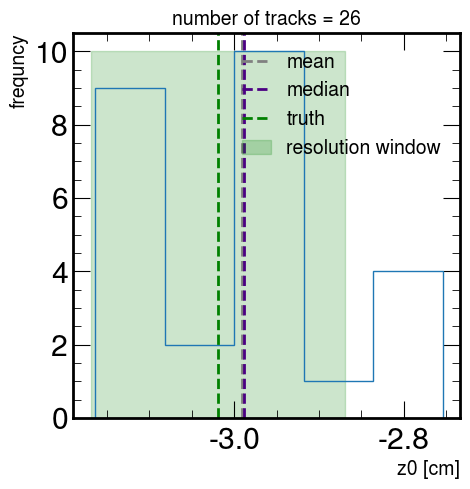

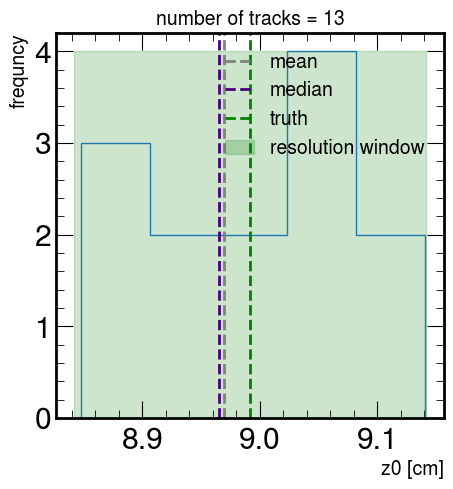

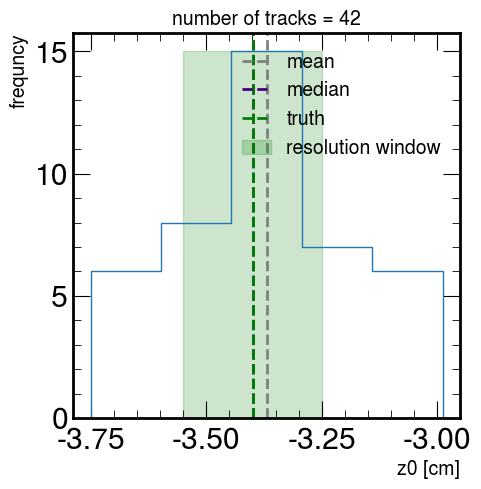

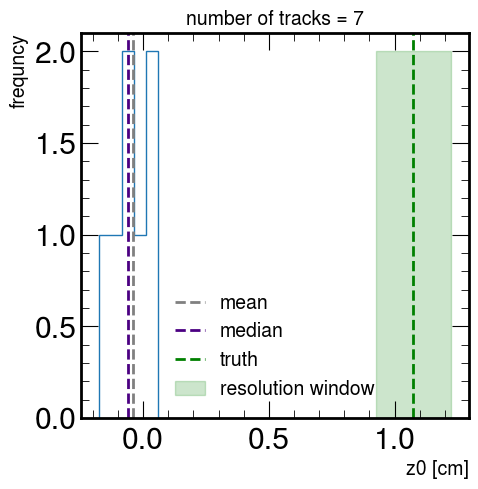

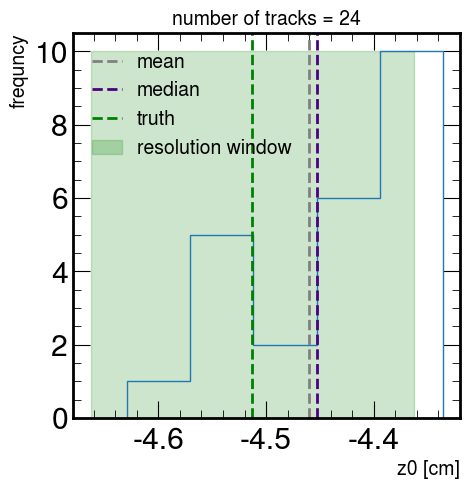

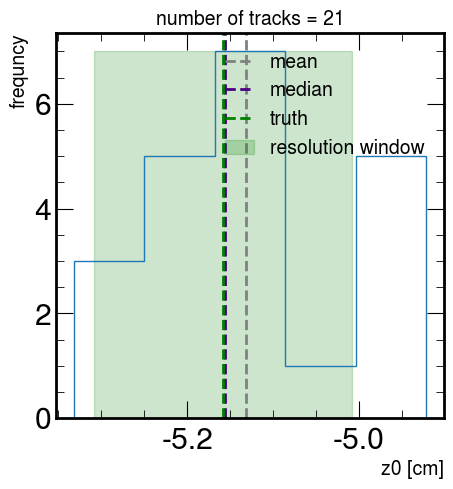

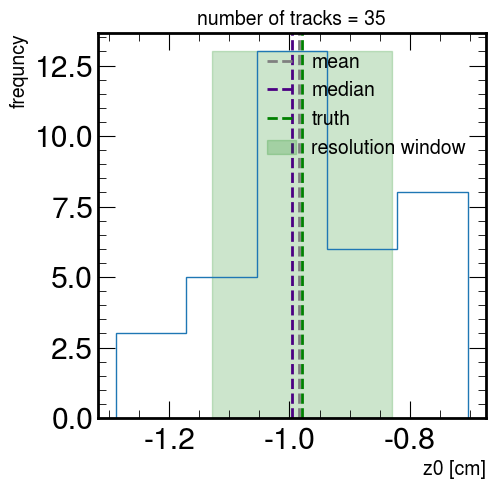

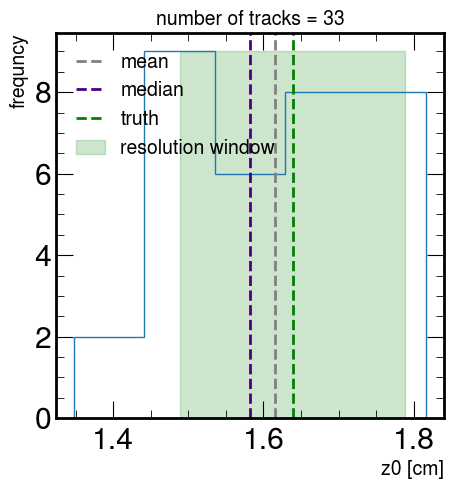

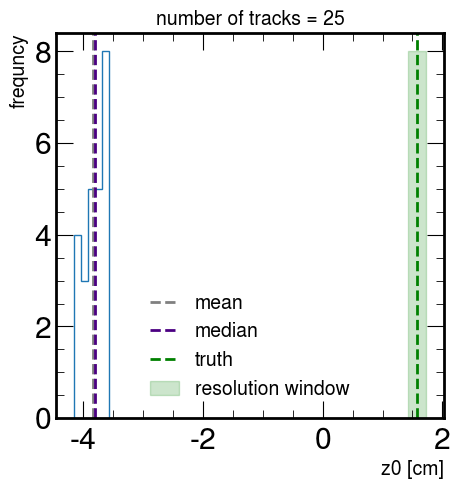

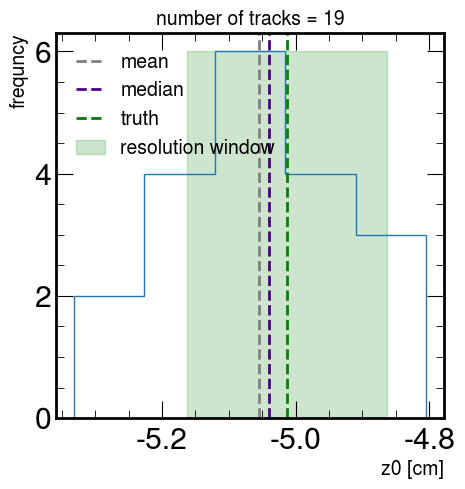

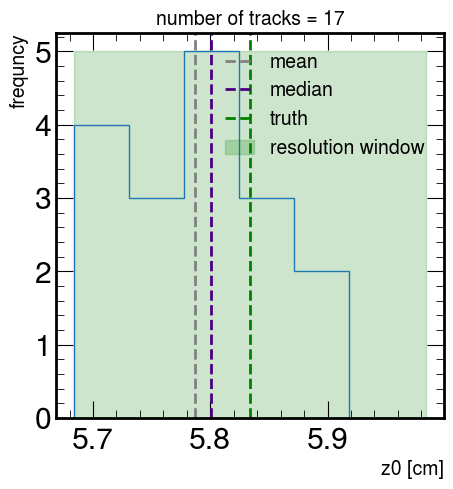

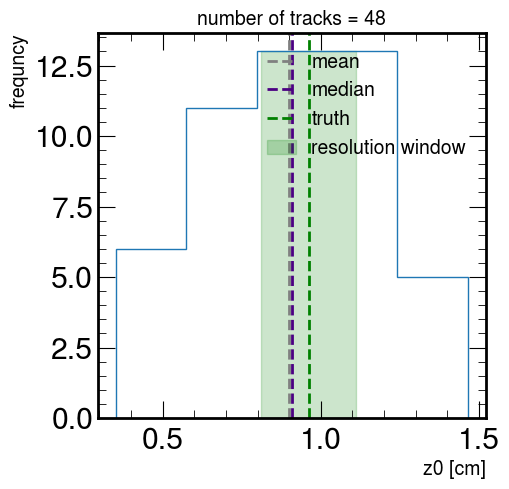

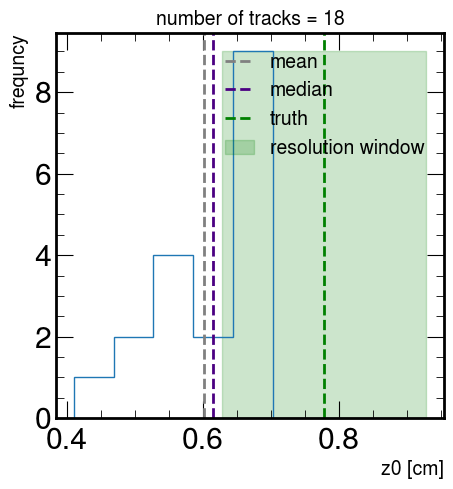

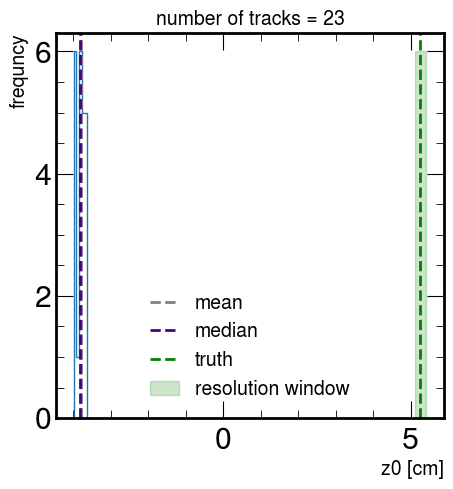

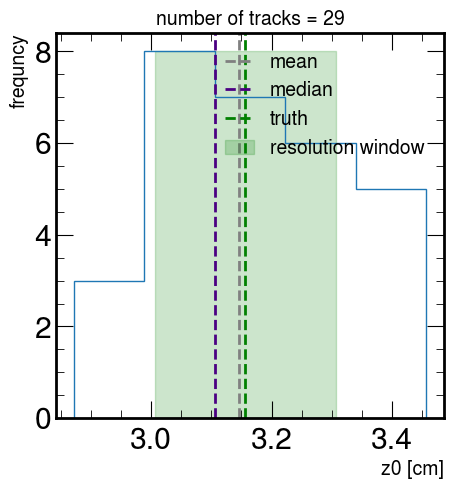

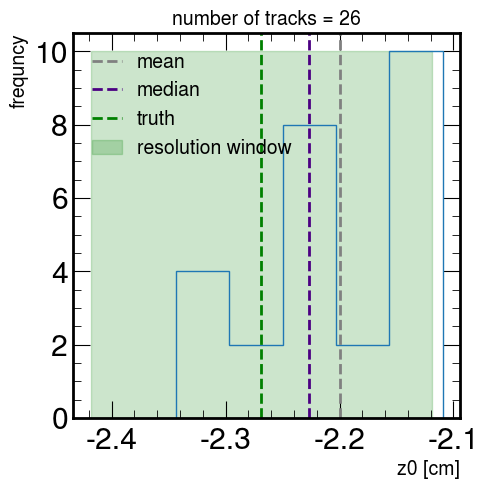

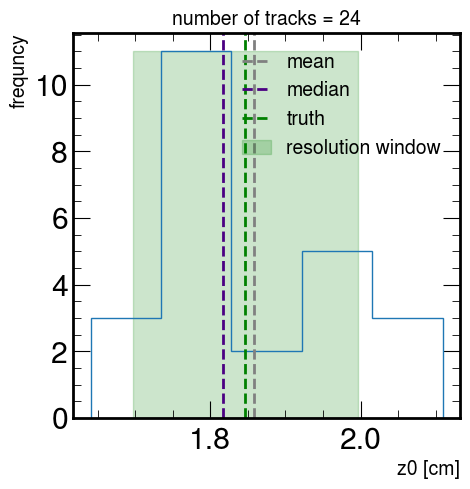

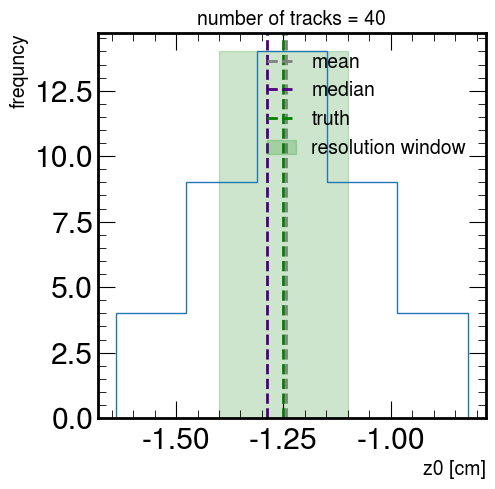

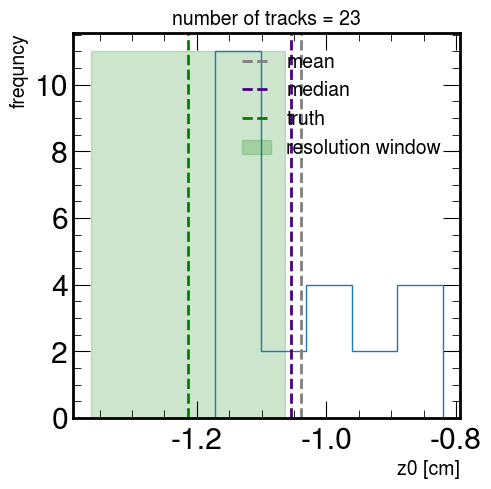

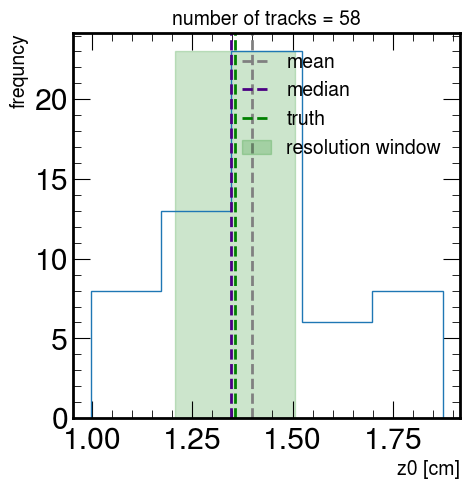

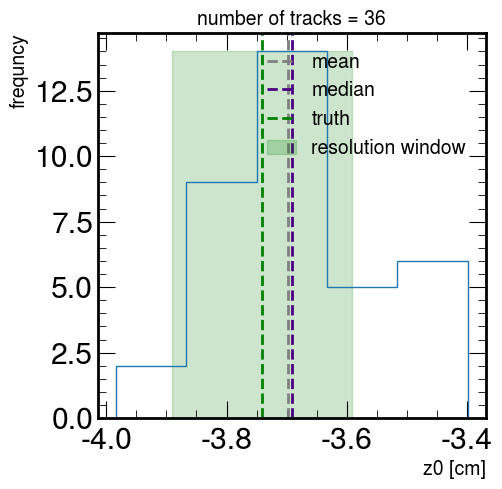

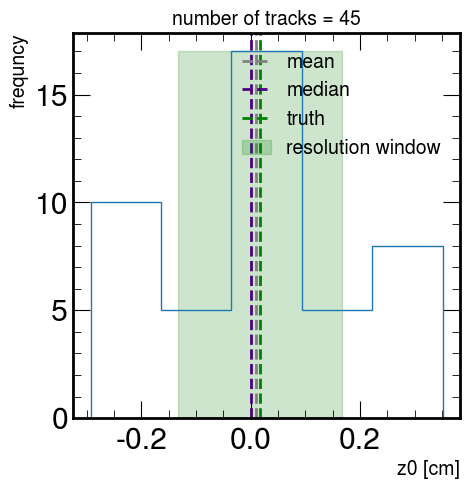

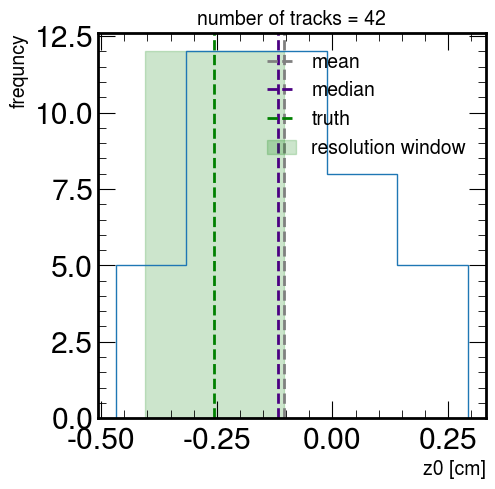

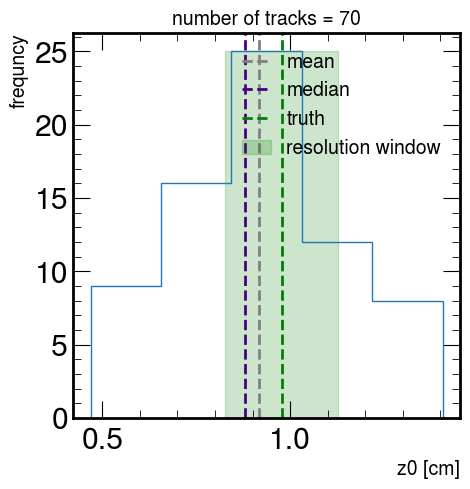

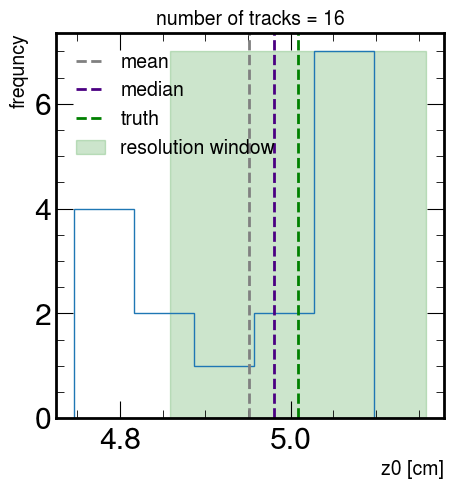

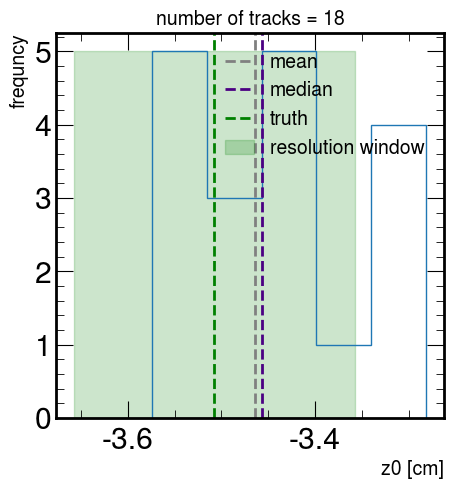

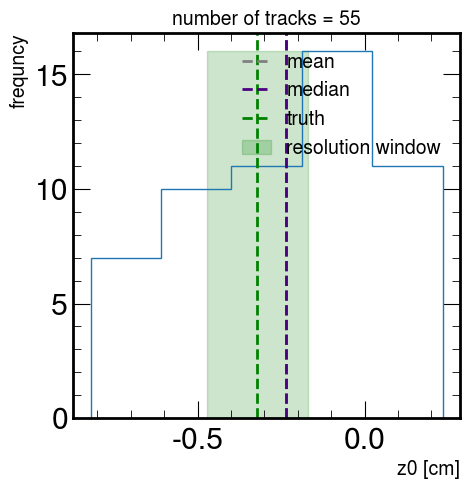

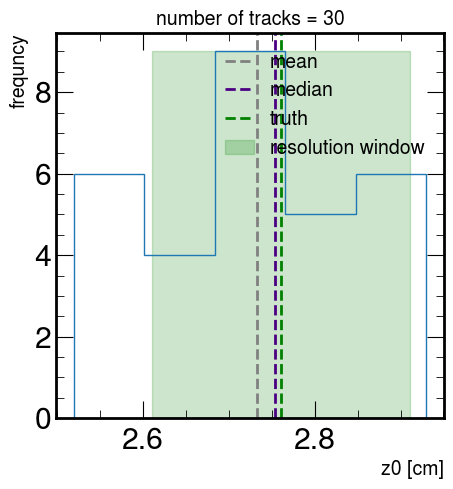

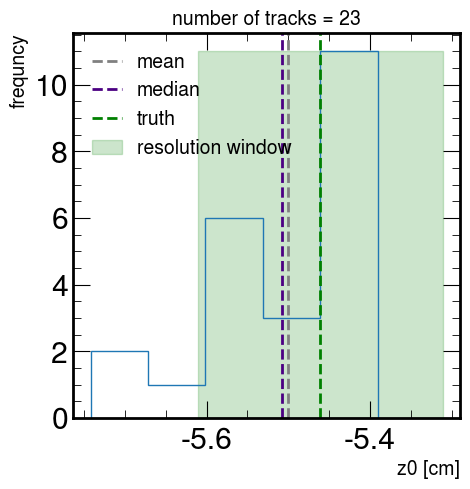

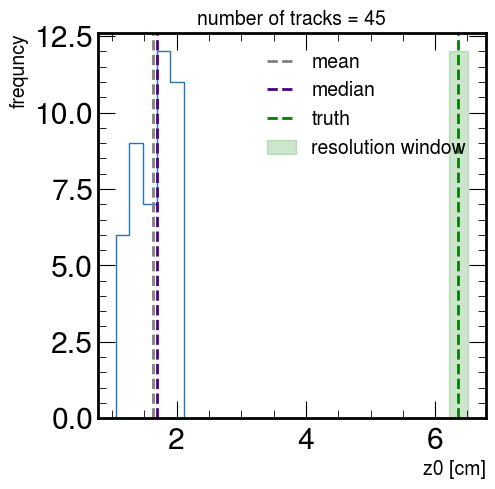

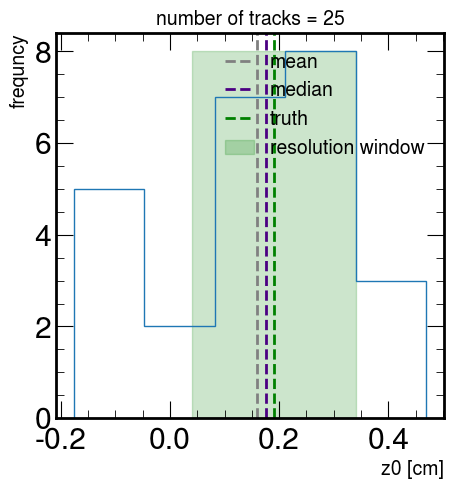

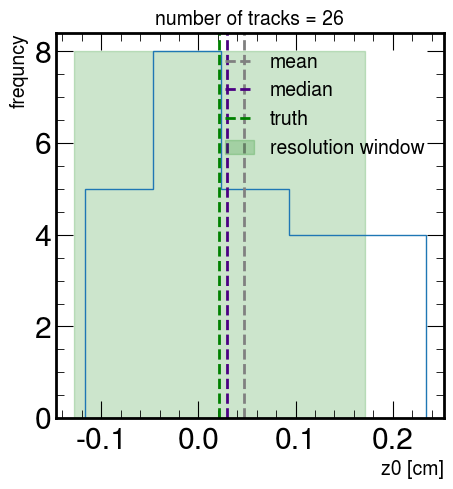

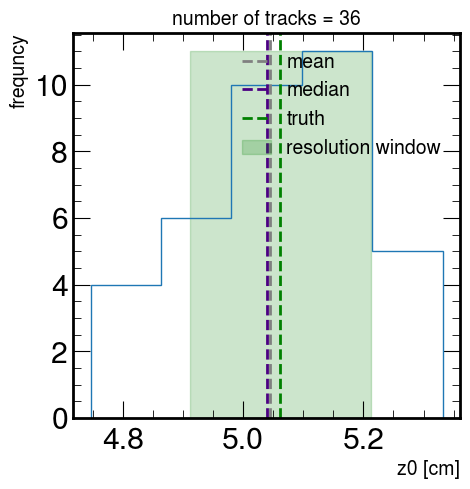

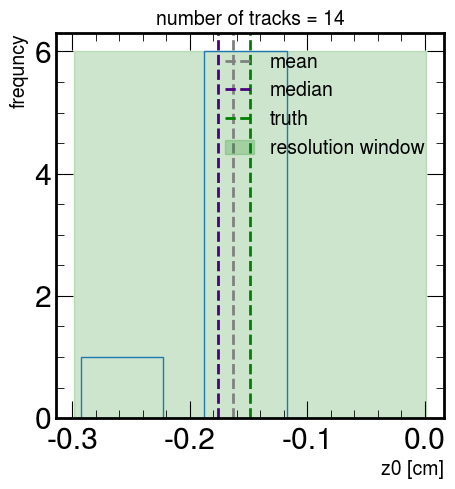

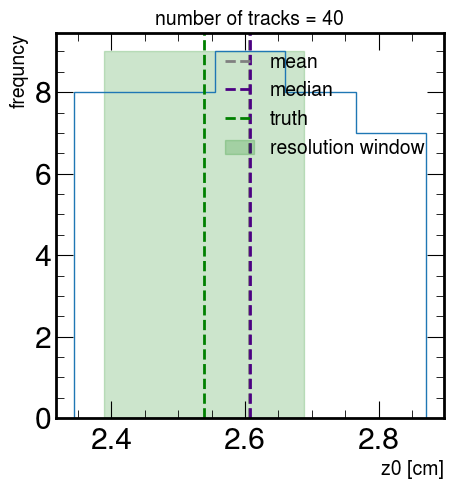

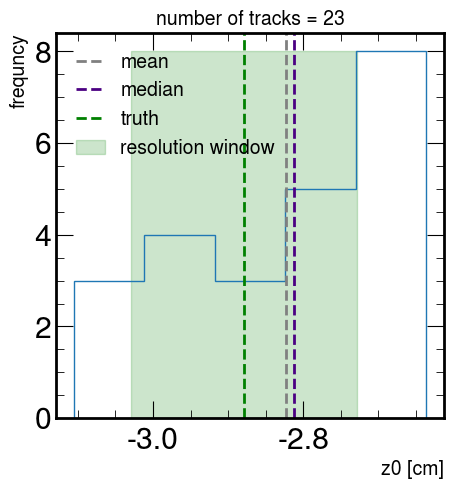

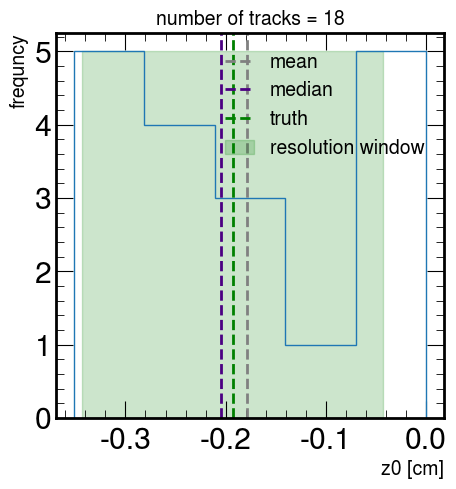

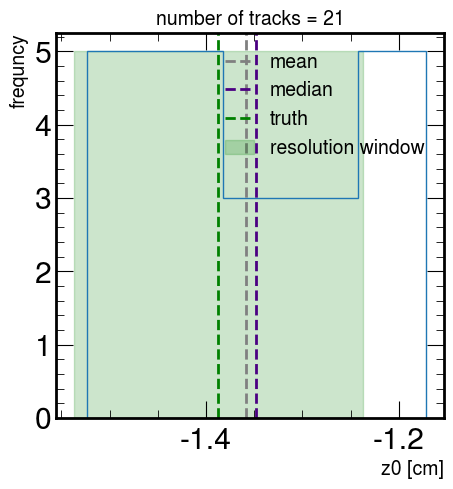

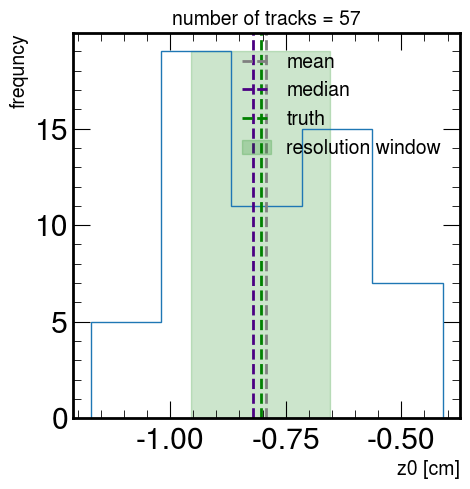

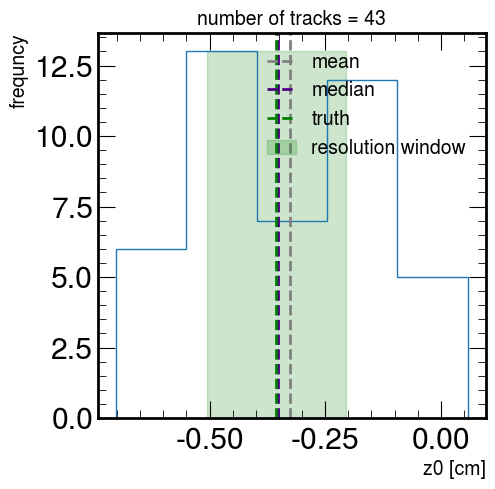

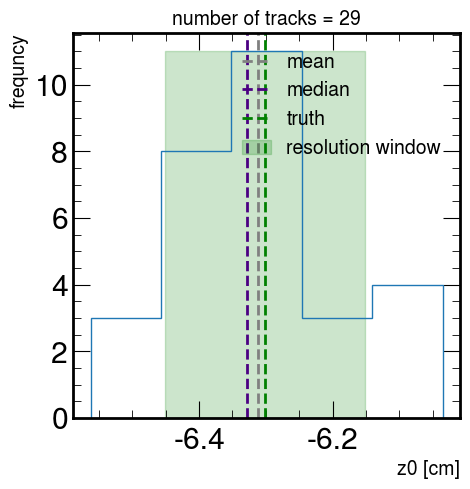

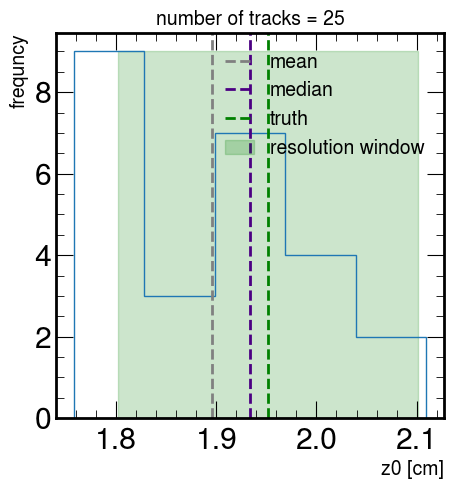

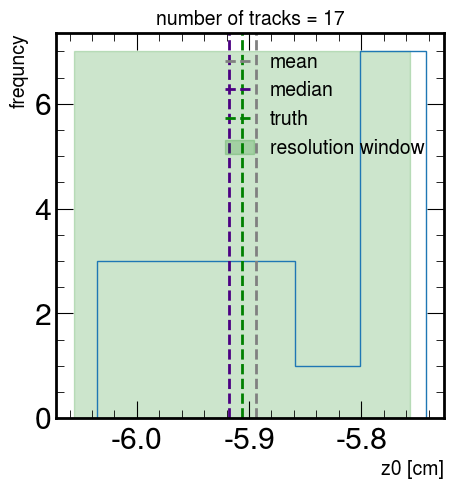

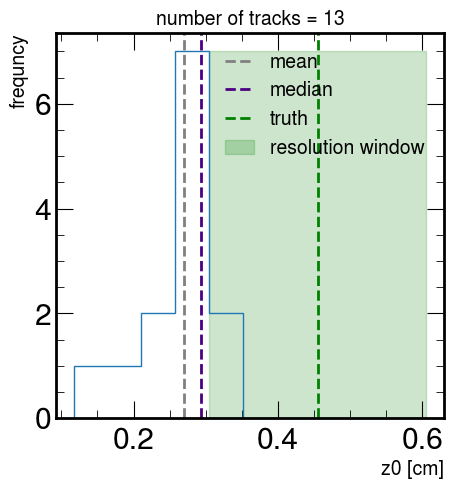

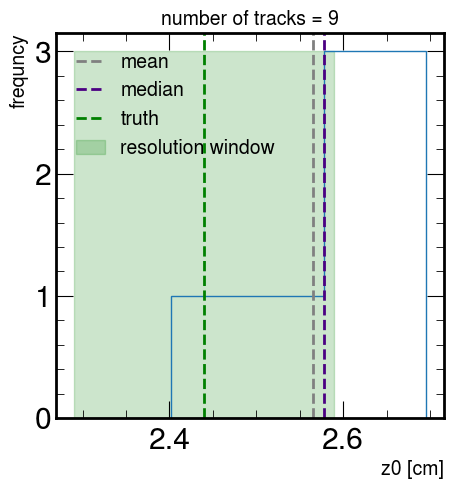

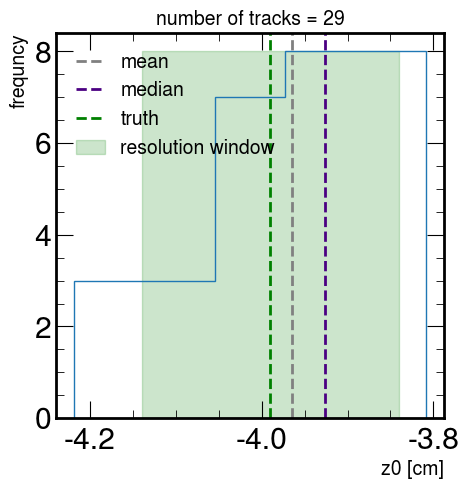

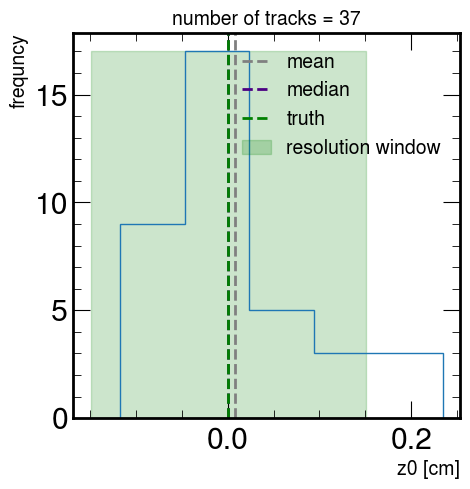

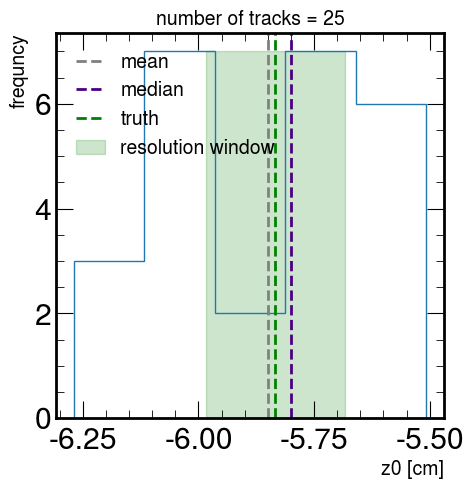

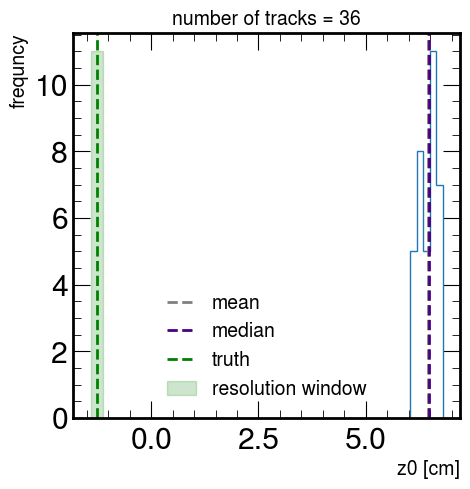

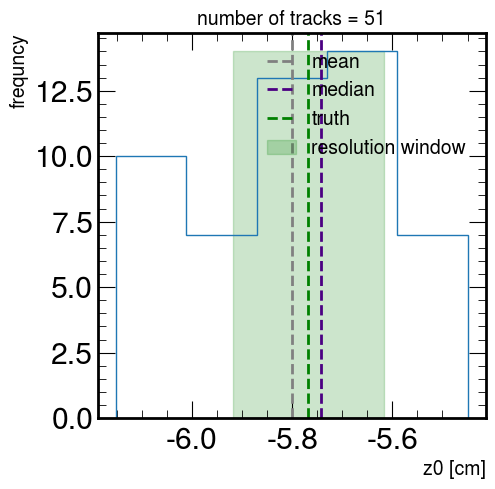

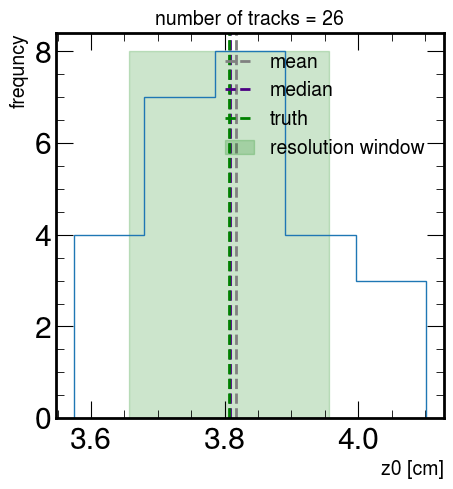

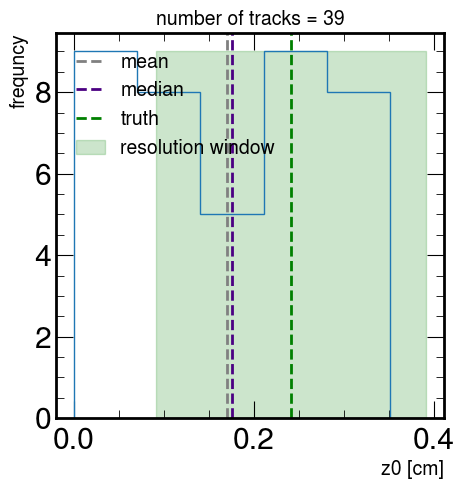

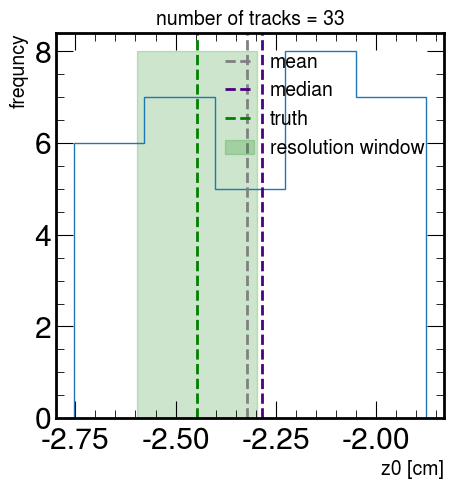

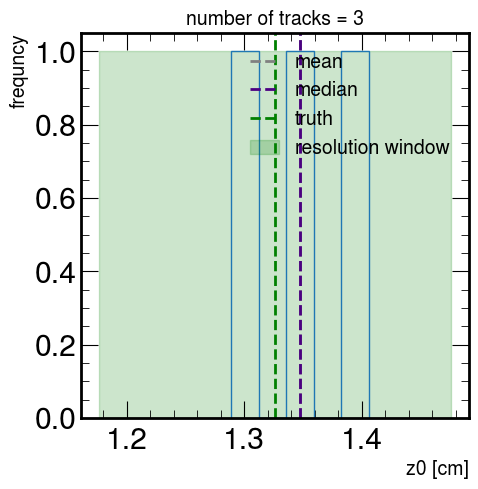

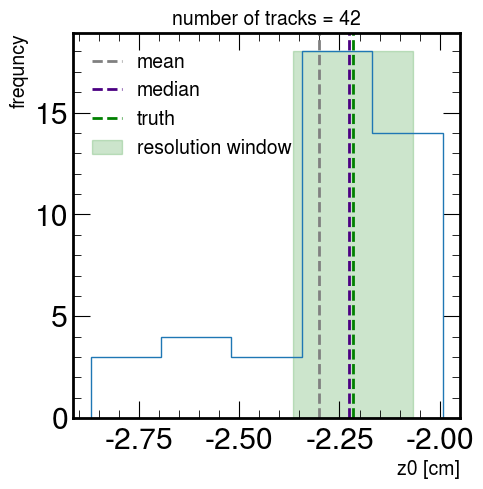

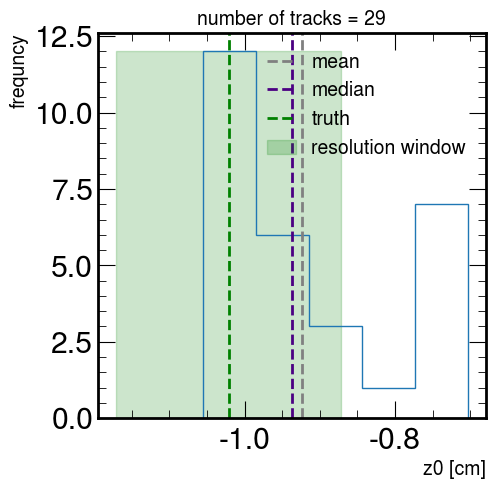

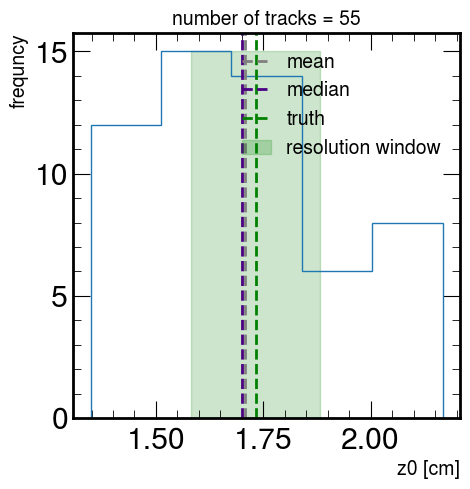

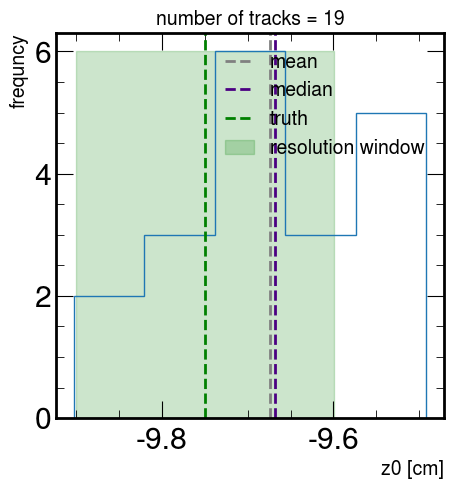

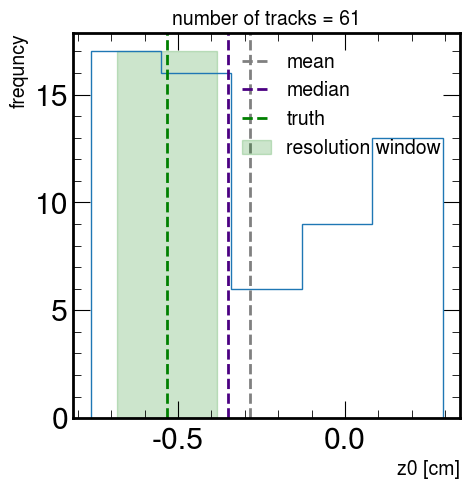

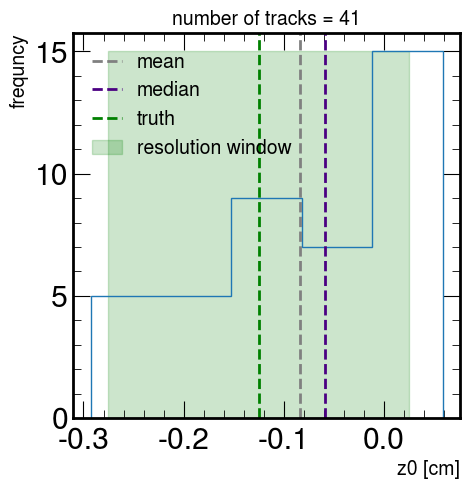

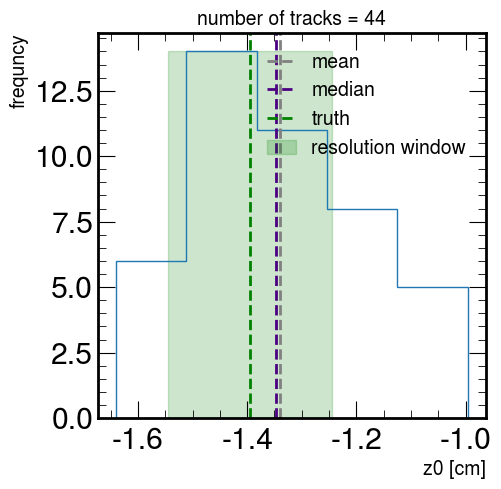

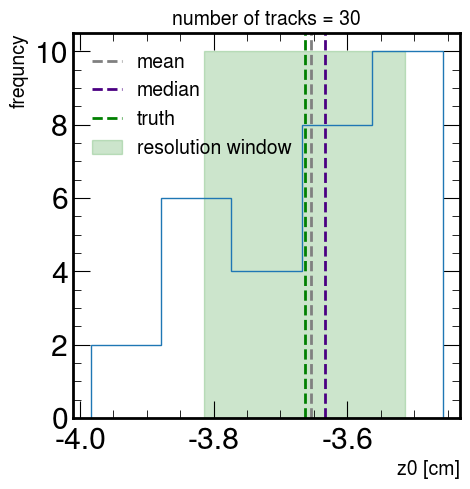

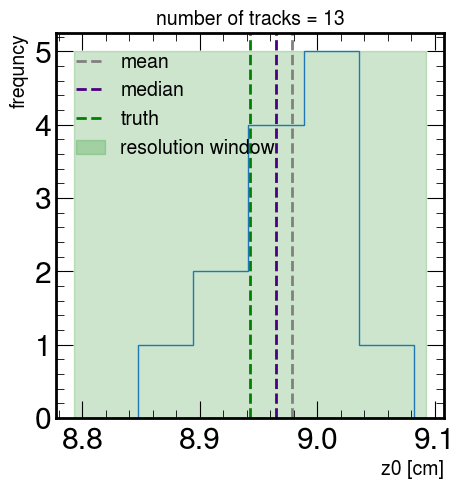

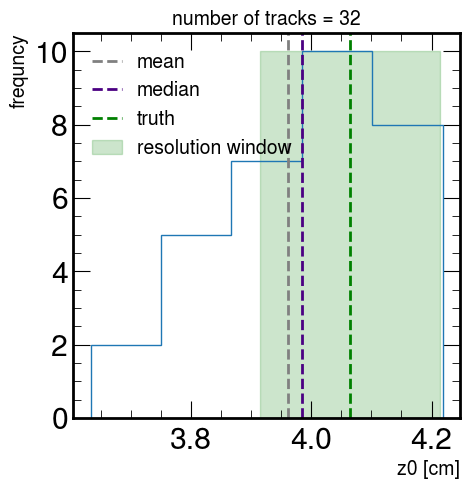

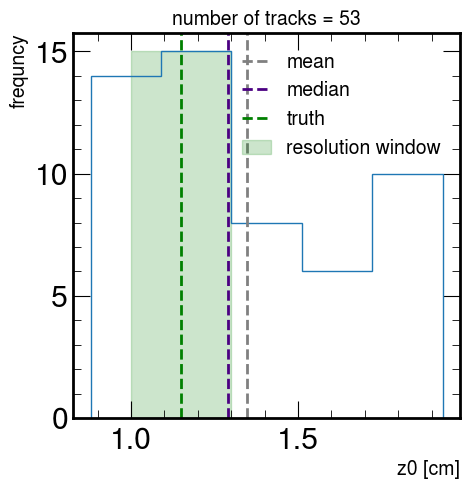

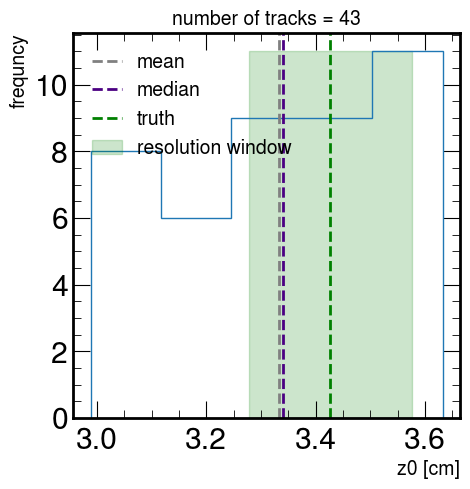

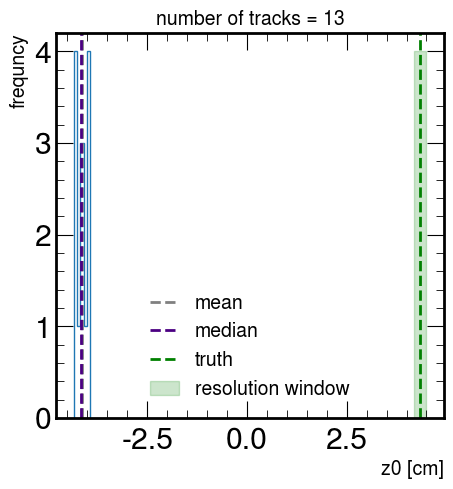

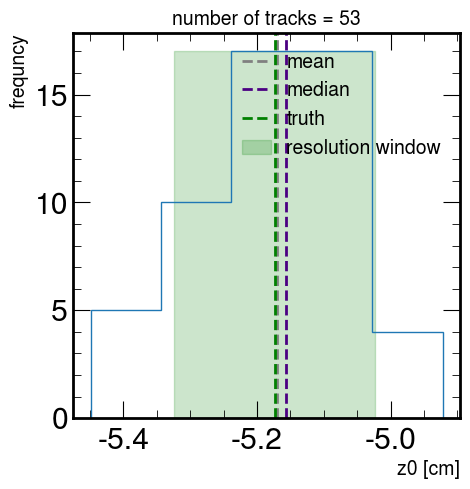

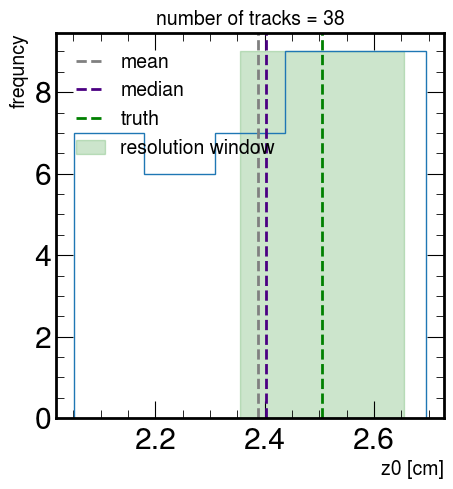

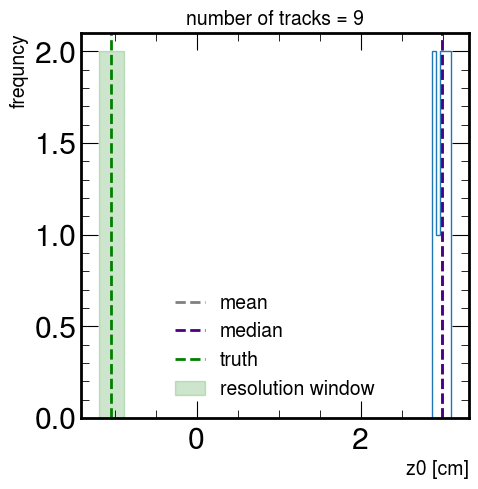

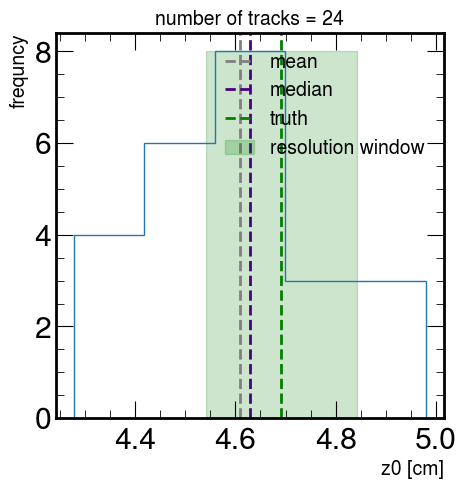

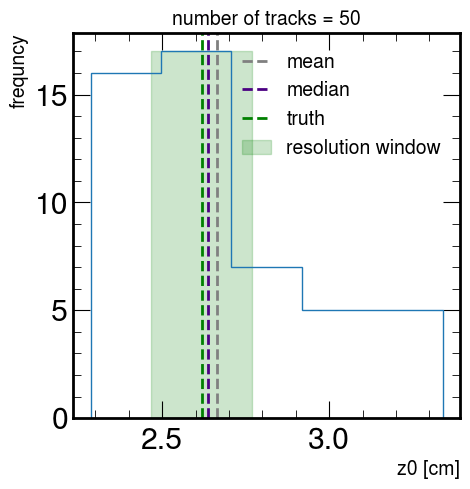

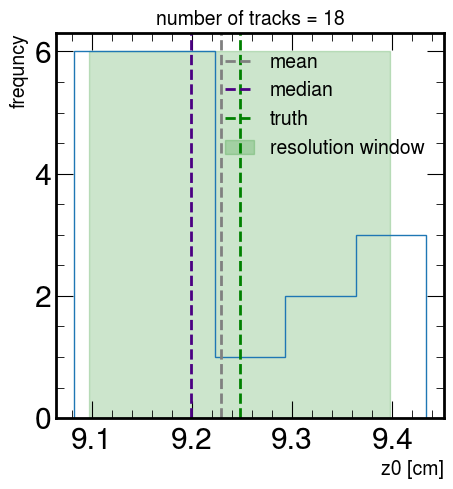

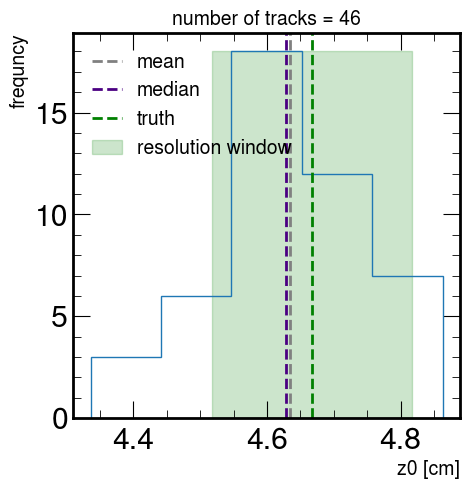

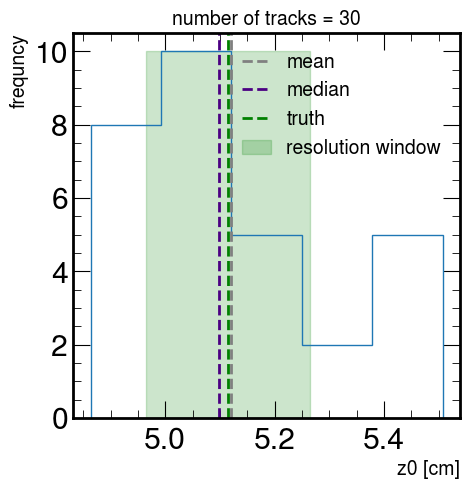

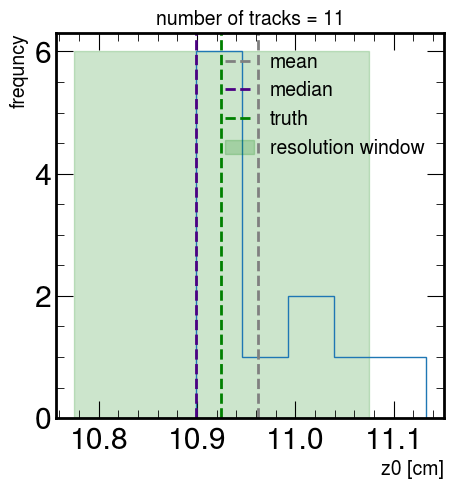

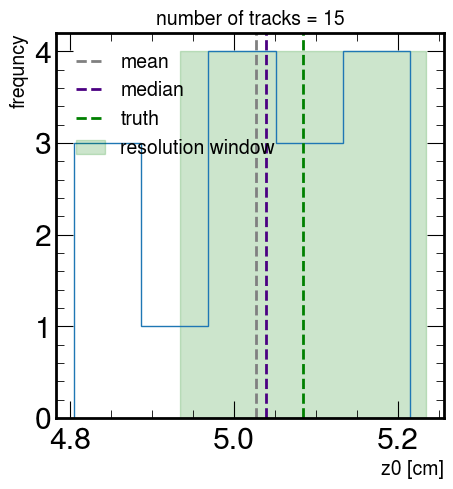

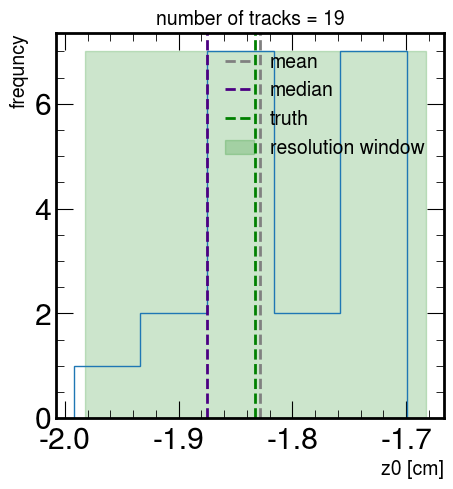

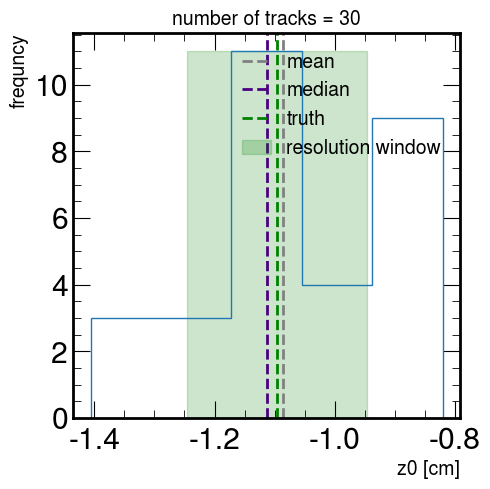

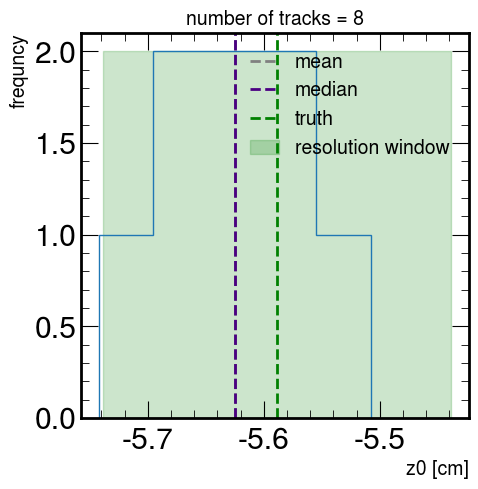

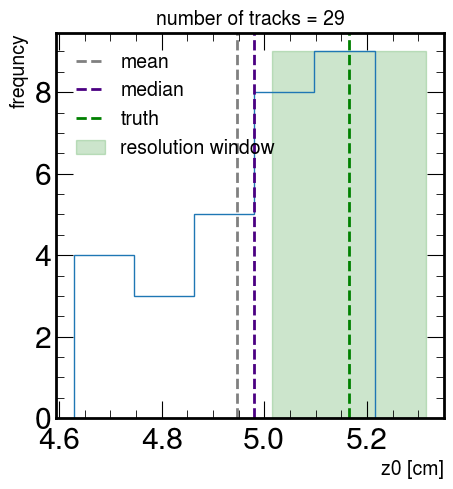

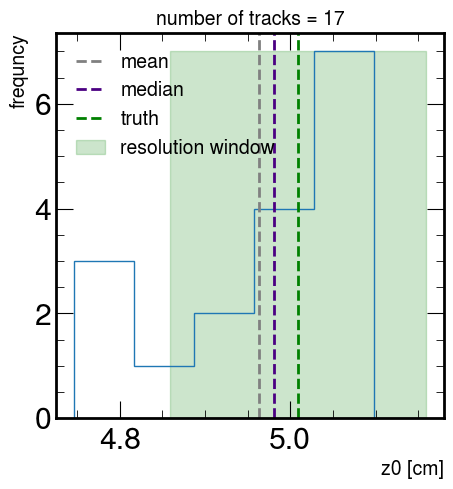

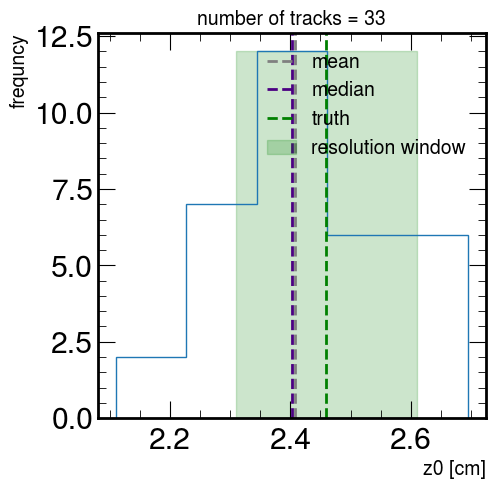

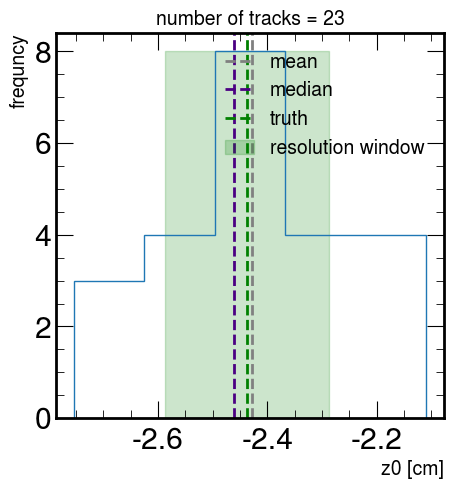

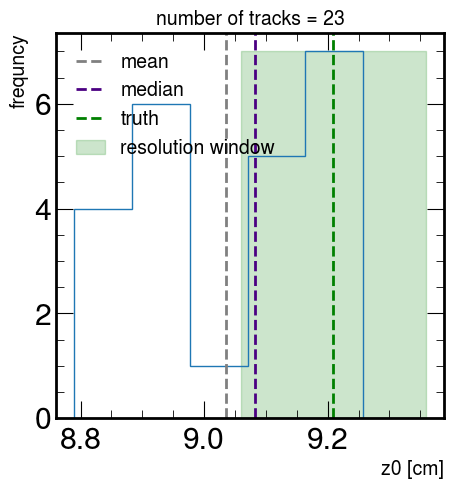

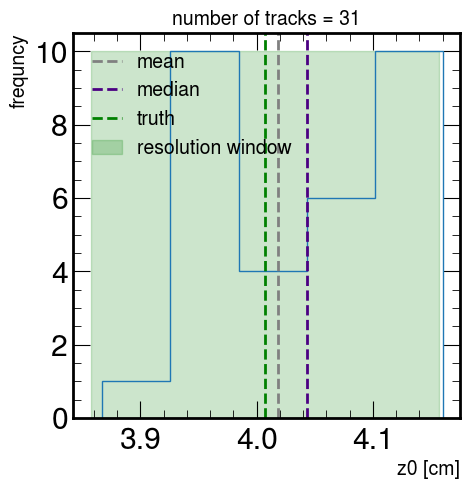

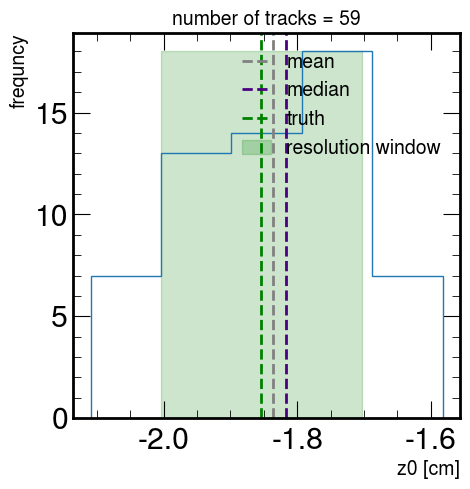

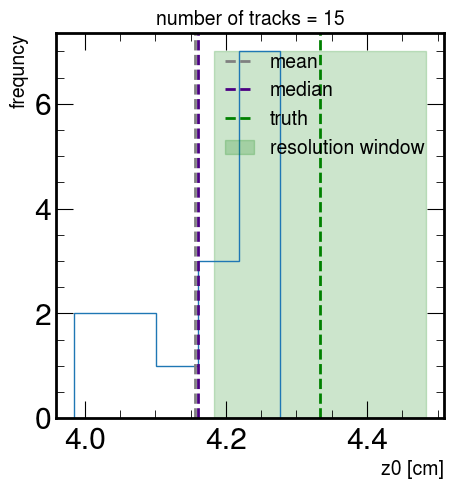

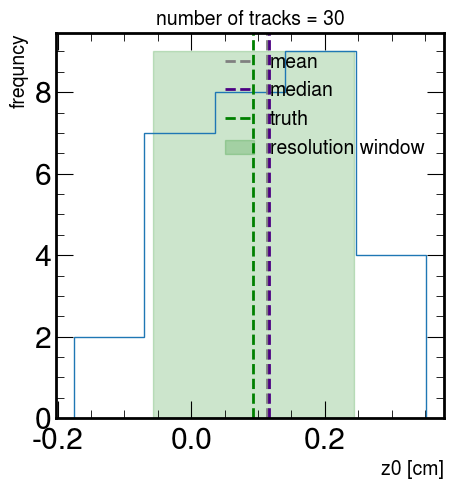

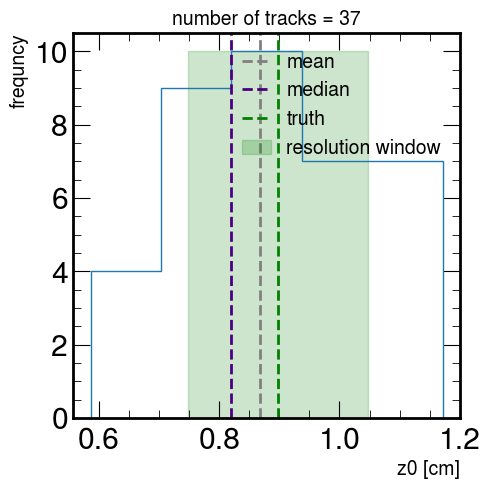

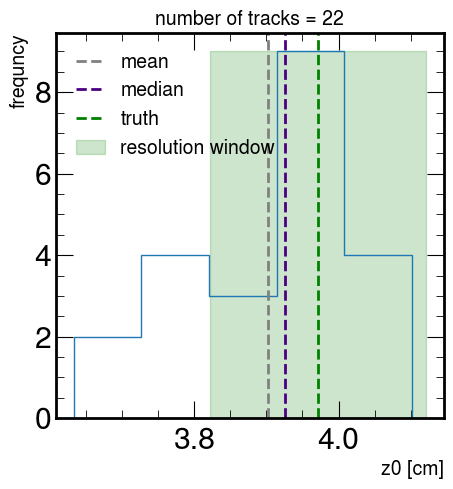

In [409]:
for i in range(100):
    PV_dbfh.plot_pv(n=i, nbins=5, figsize=(5, 5))

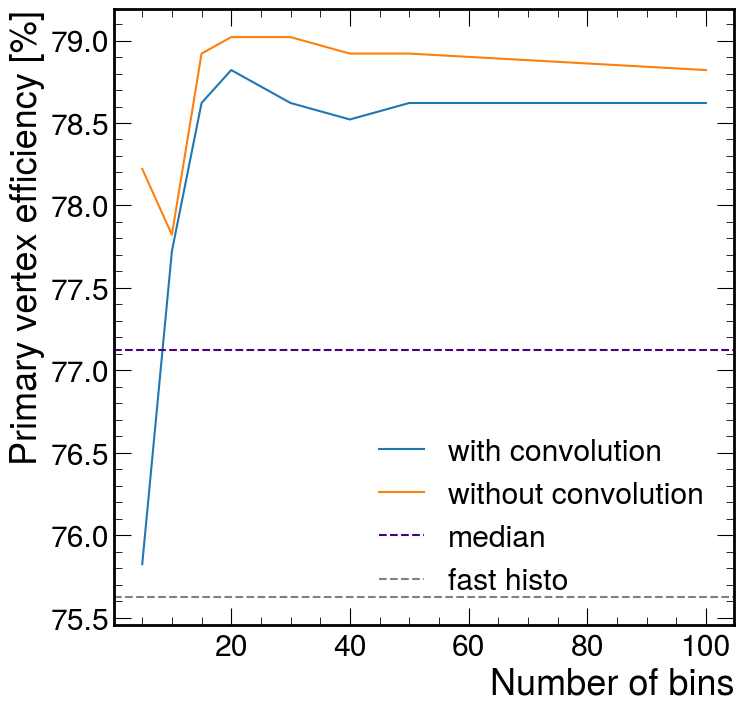

In [416]:
plt.figure(figsize=(8, 8))
plt.plot(n_bins, pv_eff_dbfh_weight_nbins, label="with convolution")
plt.plot(n_bins, pv_eff_dbfh_weight_noconv_nbins, label="without convolution")
plt.axhline(db_median_eff, label="median", ls="--", color="indigo")
plt.axhline(fh_eff, label="fast histo", ls="--", color="grey")
plt.xlabel("Number of bins")
plt.ylabel("Primary vertex efficiency [%]")
plt.legend()

In [418]:
pv_eff_dbfh_weight_nopt_noconv_nbins = []
n_bins = [5, 10, 15, 20, 30, 40, 50, 100]
for nb in n_bins:
    PV_dbfh.run_dbscan(
        stat="fast_histo", nbins=nb, weighted_mean=True, convolve=True, no_pt=True
    )
    _pm = PerformanceMetrics(PV_dbfh)
    print(nb)
    _pm.pv_efficiency((_pm.z0_gen - _pm.z0_reco_db_cor), display=True)
    pv_eff_dbfh_weight_nbins.append(_pm.pv_eff)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 1000/1001 [00:19<00:00, 52.82it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2
1.9927514
positive bias 0.02527574590734538
negative bias -0.04647288641947722
5
71.73 %


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 998/1001 [00:20<00:00, 50.35it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2
1.9927514
positive bias 0.026792531726004043
negative bias -0.041871198945842014
10
74.43 %


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1001/1001 [00:19<00:00, 57.61it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2
1.9927514
positive bias 0.026313547577176744
negative bias -0.04068858590003188
15
75.02 %


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 996/1001 [00:19<00:00, 59.36it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2
1.9927514
positive bias 0.029683177632496616
negative bias -0.036524139630845776
20
74.63 %


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1001/1001 [00:18<00:00, 66.19it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2
1.9927514
positive bias 0.030128877388582387
negative bias -0.03639684318627712
30
74.73 %


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 999/1001 [00:18<00:00, 56.58it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2
1.9927514
positive bias 0.029220223825512148
negative bias -0.03777751424810316
40
74.83 %


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 998/1001 [00:18<00:00, 51.90it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2
1.9927514
positive bias 0.028626327717737876
negative bias -0.03674815342094173
50
74.93 %


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 999/1001 [00:19<00:00, 59.87it/s]/home/raichu/miniconda3/envs/db/lib/python3.9/site-packages/tqdm/std.py:814: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return getattr(df, df_function)(wrapper, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

Ran DBSCAN with eps: 0.08, minPts: 2
1.9927514
positive bias 0.028877272750392535
negative bias -0.03681128200675454
100
75.02 %
